In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
diabetes_012_health_indicators_BRFSS2015 = 'https://raw.githubusercontent.com/Panta-Rhei-LZ/DS-9000-Project-Data/refs/heads/main/diabetes_012_health_indicators_BRFSS2015.csv'
diabetes_binary_health_indicators_BRFSS2015 = 'https://raw.githubusercontent.com/Panta-Rhei-LZ/DS-9000-Project-Data/refs/heads/main/diabetes_binary_health_indicators_BRFSS2015.csv'
diabetes_binary_5050split_health_indicators_BRFSS2015 = 'https://raw.githubusercontent.com/Panta-Rhei-LZ/DS-9000-Project-Data/refs/heads/main/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'

# Load the CSV file
diabetes_012_health_indicators_BRFSS2015 = pd.read_csv(diabetes_012_health_indicators_BRFSS2015)
diabetes_binary_health_indicators_BRFSS2015 = pd.read_csv(diabetes_binary_health_indicators_BRFSS2015)
diabetes_binary_5050split_health_indicators_BRFSS2015 = pd.read_csv(diabetes_binary_5050split_health_indicators_BRFSS2015)

In [3]:
df = diabetes_binary_5050split_health_indicators_BRFSS2015
# df = diabetes_binary_health_indicators_BRFSS2015
df = df.sample(len(df))

X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

df.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
38319              1.0     1.0       1.0        1.0  29.0     0.0     0.0   
2619               0.0     0.0       0.0        1.0  20.0     0.0     0.0   
49557              1.0     1.0       1.0        1.0  38.0     1.0     0.0   
38401              1.0     0.0       0.0        1.0  21.0     0.0     0.0   
49573              1.0     1.0       1.0        1.0  39.0     1.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
38319                   0.0           1.0     0.0      0.0                0.0   
2619                    0.0           1.0     1.0      1.0                0.0   
49557                   1.0           0.0     0.0      1.0                0.0   
38401                   0.0           1.0     0.0      1.0                0.0   
49573                   0.0           0.0     1.0      0.0                0.0   

       AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
38319            1.0          0.0      4.0       0.0       0.0       0.0  0.0   
2619             1.0          0.0      1.0       0.0       0.0       0.0  1.0   
49557            1.0          0.0      3.0       0.0       0.0       0.0  1.0   
38401            1.0          0.0      3.0       0.0       0.0       0.0  0.0   
49573            1.0          1.0      4.0       0.0      10.0       1.0  1.0   

        Age  Education  Income  
38319  12.0        6.0     7.0  
2619    8.0        5.0     8.0  
49557  11.0        4.0     6.0  
38401   2.0        6.0     7.0  
49573  11.0        4.0     6.0

## Distribution

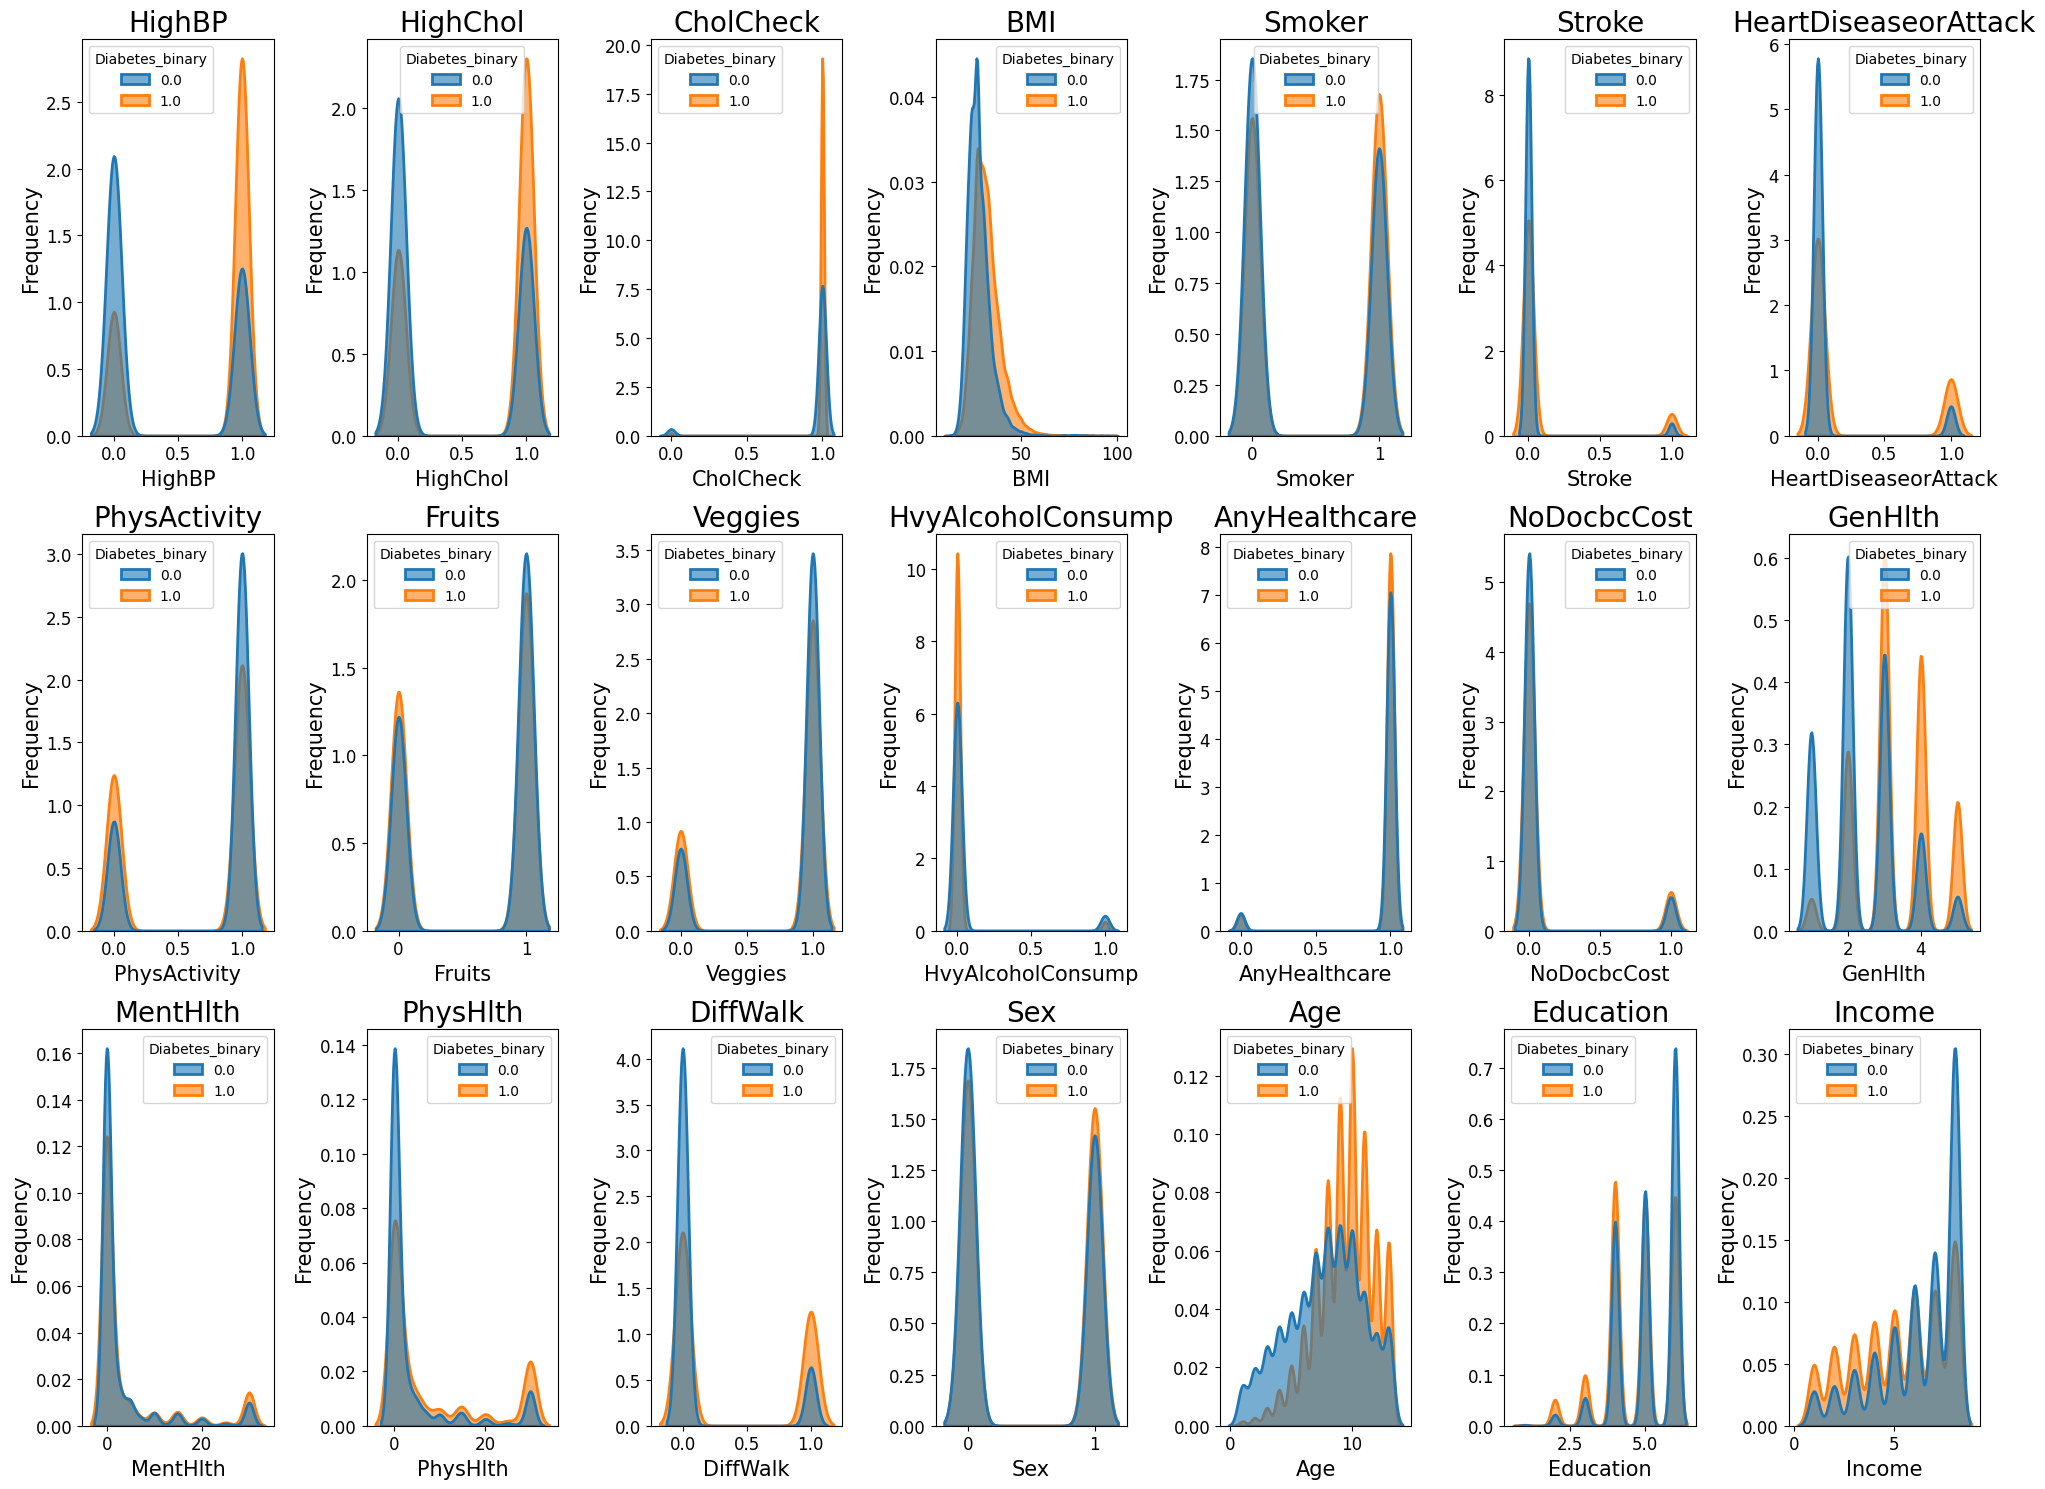

In [4]:
# Set figure size
plt.figure(figsize=(20, 15))

# Create histograms for each feature with 'hue' to differentiate by class
for i, column in enumerate(X.columns):
    plt.subplot(3, 7, i+1)  # Adjust the subplot position
    sns.kdeplot(data=df, x=column, hue='Diabetes_binary', fill=True, alpha=0.6, linewidth=2)
    
    # Adjust labels and title for each subplot
    plt.title(f'{column}', fontsize=20)
    plt.xlabel(column, fontsize=15)
    plt.ylabel('Frequency', fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

## Interactions

In [5]:
# Create a pairplot to visualize the interactions between features
# sns.pairplot(df, hue='Diabetes_binary', palette="Set1", plot_kws={'alpha': 0.5})
# plt.show()

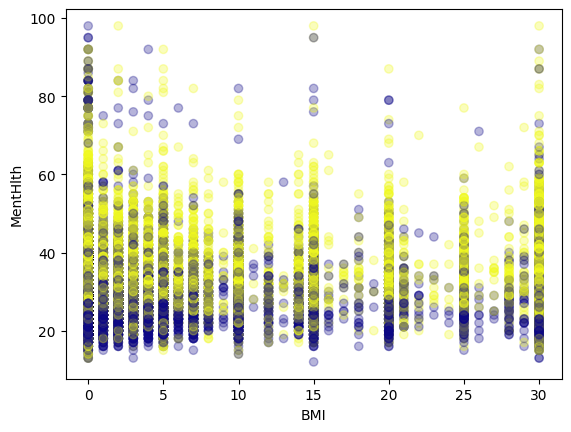

In [6]:
plt.scatter(
    df['MentHlth'],
    df['BMI'],
    c=df['Diabetes_binary'], 
    cmap='plasma',
    alpha=0.3
)
plt.xlabel("BMI")
plt.ylabel("MentHlth")
plt.show()

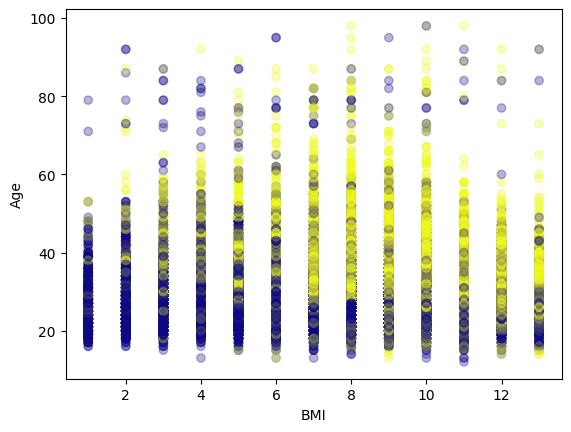

In [7]:
plt.scatter(
    df['Age'],
    df['BMI'],
    c=df['Diabetes_binary'], 
    cmap='plasma',
    alpha=0.3
)
plt.xlabel("BMI")
plt.ylabel("Age")
plt.show()

### Age vs Diabetes

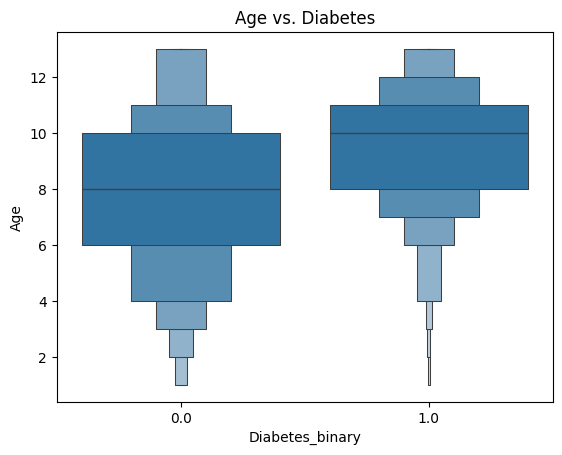

In [8]:
import seaborn as sns
age_diabetes = sns.boxenplot(x='Diabetes_binary', y='Age', data=df)
plt.title("Age vs. Diabetes")
plt.show()

### BMI vs. Diabetes

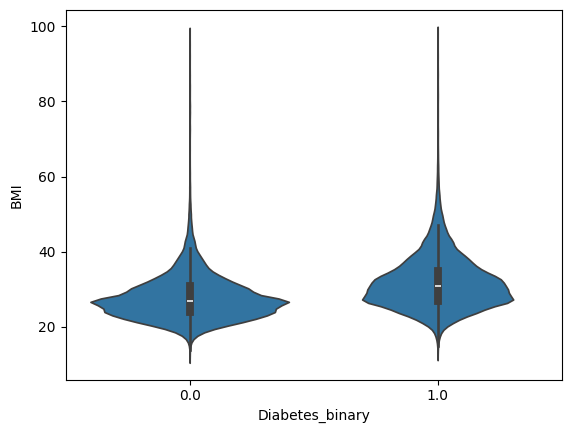

In [9]:
bmi_diabetes = sns.violinplot(x='Diabetes_binary', y='BMI', data=df)

plt.show()

### Smoker vs Diabetes

In [10]:
pd.crosstab(df['Diabetes_binary'], df['Smoker'])

Smoker             0.0    1.0
Diabetes_binary              
0.0              20065  15281
1.0              17029  18317

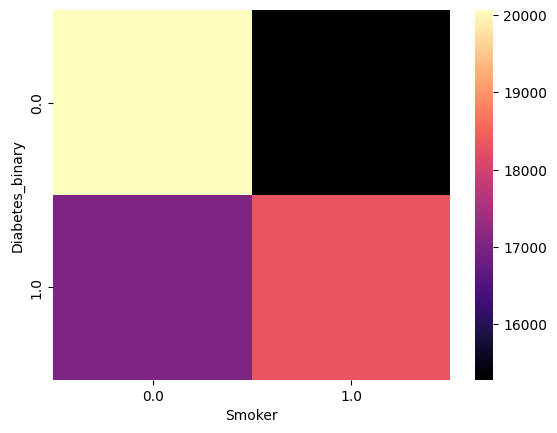

In [11]:
smoker_diabetes = sns.heatmap(pd.crosstab(df['Diabetes_binary'], df['Smoker']), cmap='magma')
plt.show()

### Sex vs. Diabetes

In [12]:
pd.crosstab(df['Diabetes_binary'], df['Sex'])

Sex                0.0    1.0
Diabetes_binary              
0.0              19975  15371
1.0              18411  16935

### HighBP vs Diabetes

In [13]:
pd.crosstab(df['Diabetes_binary'], df['HighBP'])

HighBP             0.0    1.0
Diabetes_binary              
0.0              22118  13228
1.0               8742  26604

### Mental Health vs Diabetes

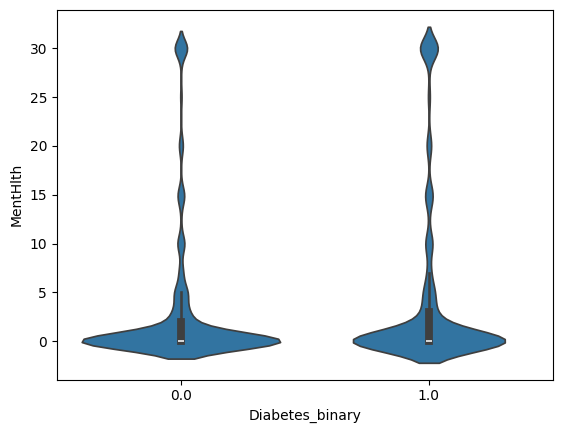

In [14]:
mentalhealth_diabetes = sns.violinplot(x='Diabetes_binary', y='MentHlth', data=df)


### Physical health

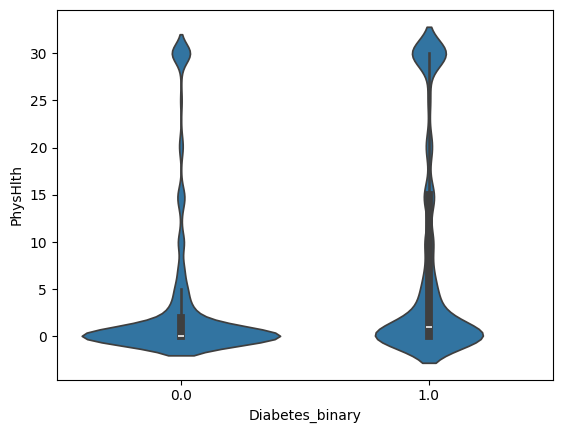

In [15]:
physical_diabetes = sns.violinplot(x='Diabetes_binary', y='PhysHlth', data=df)

### Income vs Diabetes

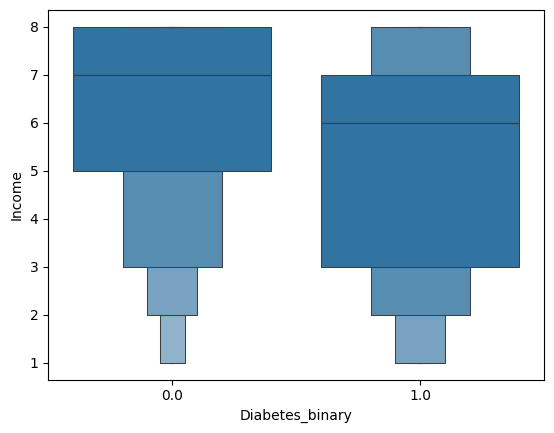

In [16]:
income_diabetes = sns.boxenplot(x='Diabetes_binary', y='Income', data=df)

### Education vs Diabetes

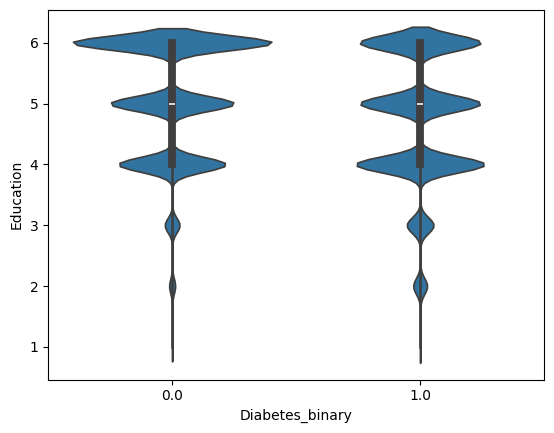

In [17]:
education_diabetes = sns.violinplot(x='Diabetes_binary', y='Education', data=df)

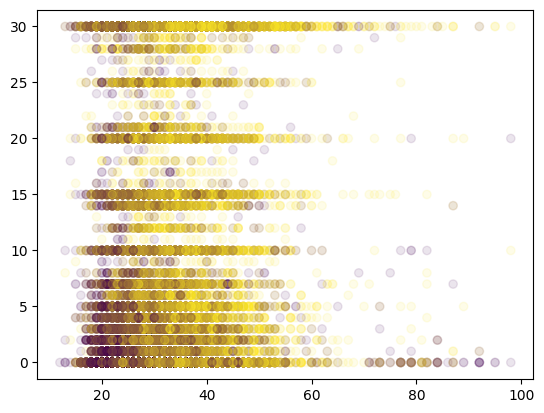

In [18]:
plt.scatter(df['BMI'], df['PhysHlth'], c=df['HighBP'], alpha=0.1)
plt.show()

## Data Preprocessing

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_cols = [col for col in X.columns if len(X[col].unique()) == 2]
num_cols = [col for col in X.columns if col not in cat_cols]

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

preprocessor.fit(X)
X_scaled = preprocessor.transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=preprocessor.get_feature_names_out())

## Correlation

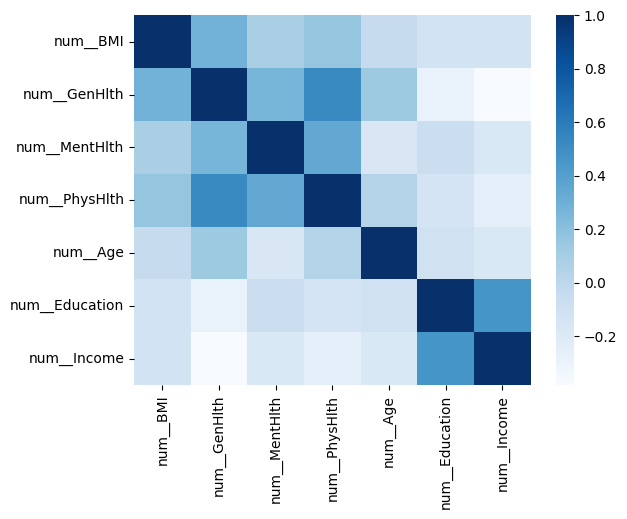

In [20]:
sns.heatmap(df_scaled[[col for col in df_scaled.columns if col.startswith('num')]].corr(method='spearman'), cmap='Blues')
plt.show()

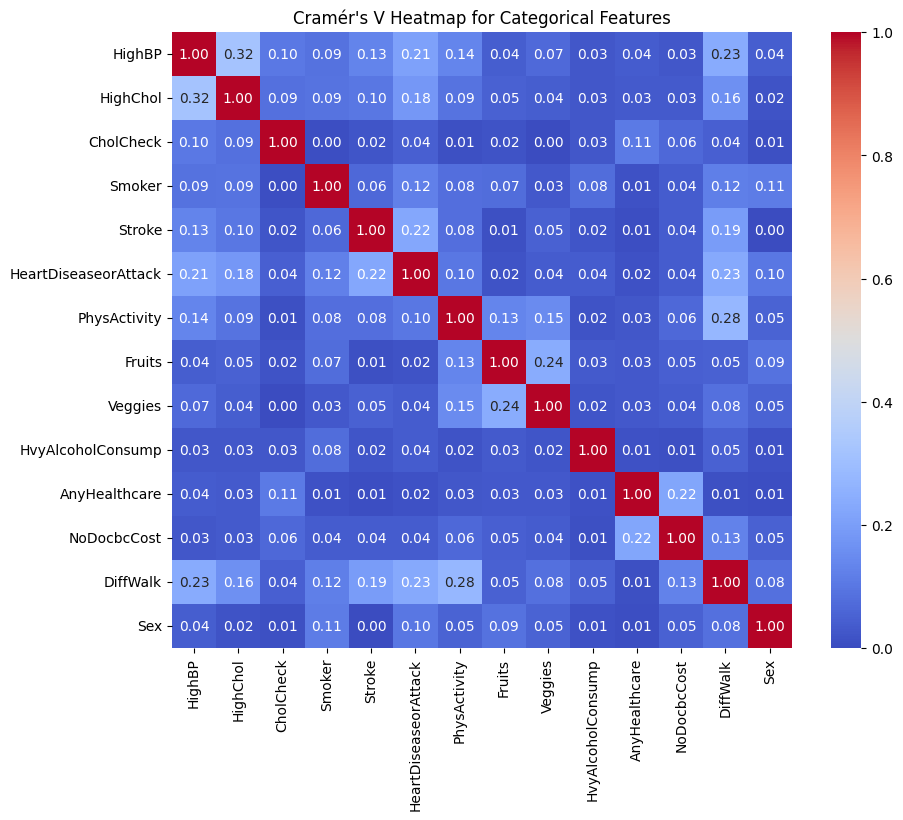

In [21]:
from scipy.stats import chi2_contingency

# Function to compute Cramér's V
def cramers_v(x, y):
    contingency = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(contingency)
    n = contingency.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency.shape) - 1)))

# Example dataframe with categorical columns
df_categorical = df[cat_cols]

# Compute the Cramér's V matrix
cramersv_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        cramersv_matrix.loc[col1, col2] = cramers_v(df_categorical[col1], df_categorical[col2])

# Convert to float for proper heatmap rendering
cramersv_matrix = cramersv_matrix.astype(float)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramersv_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=0, vmax=1)
plt.title("Cramér's V Heatmap for Categorical Features")
plt.show()

## Dimensionality Reduction

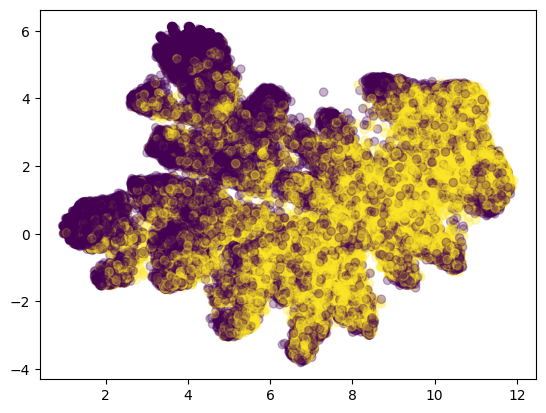

In [22]:
from umap import UMAP

umap_model = UMAP(n_neighbors=300)
X_umap = umap_model.fit_transform(X_scaled)

plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, alpha=0.3)
plt.show()

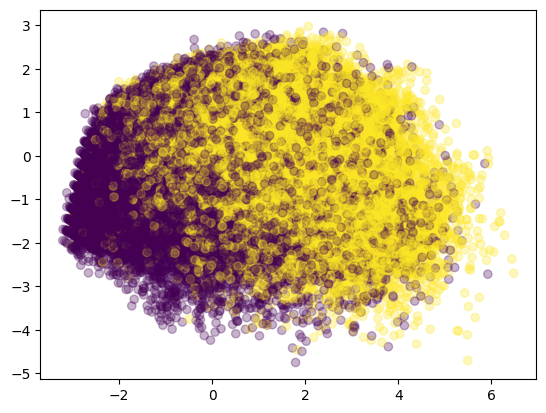

In [23]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.3)
plt.show()

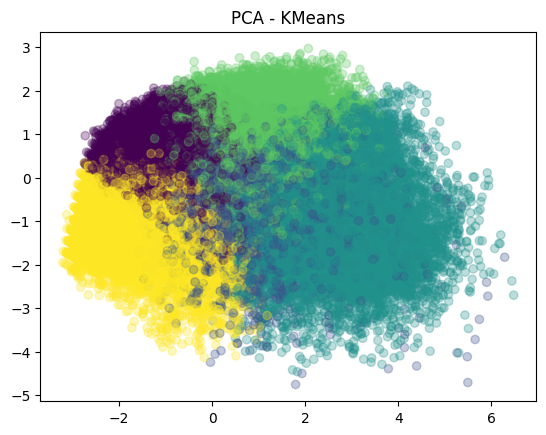

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)

y_kmeans = kmeans.fit_predict(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, alpha=0.3)
plt.title('PCA - KMeans')
plt.show()

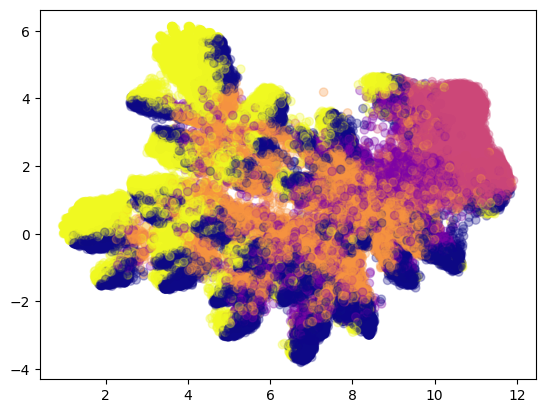

In [25]:
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_kmeans, alpha=0.3, cmap='plasma')
plt.show()

/var/folders/tg/ttd_w_4j13g0n14_fk_ll58c0000gn/T/ipykernel_3250/1053444159.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


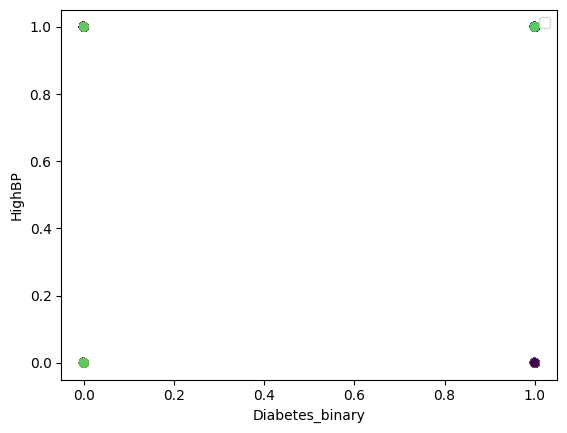

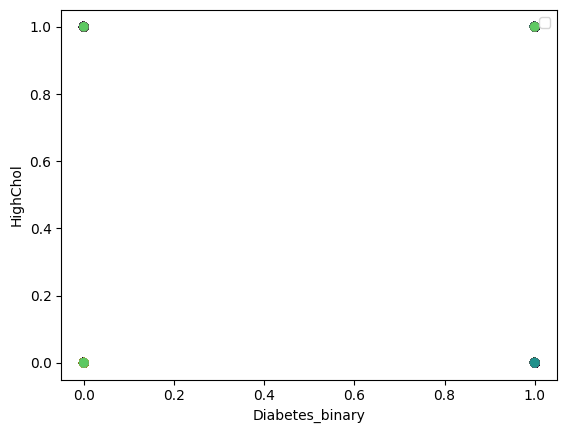

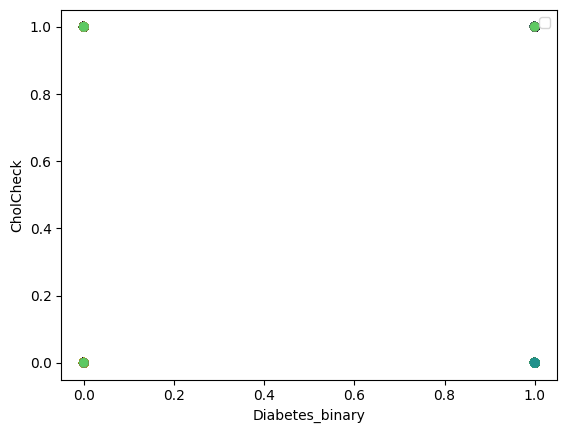

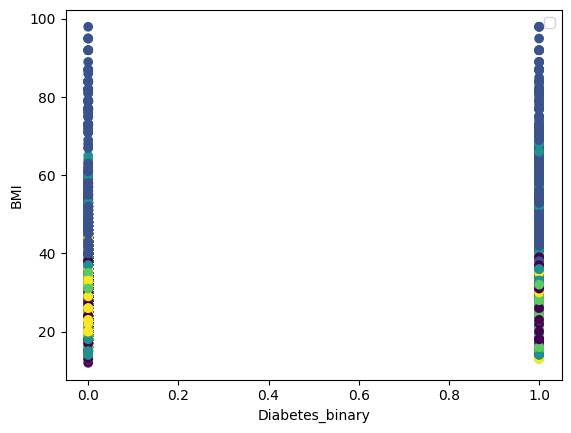

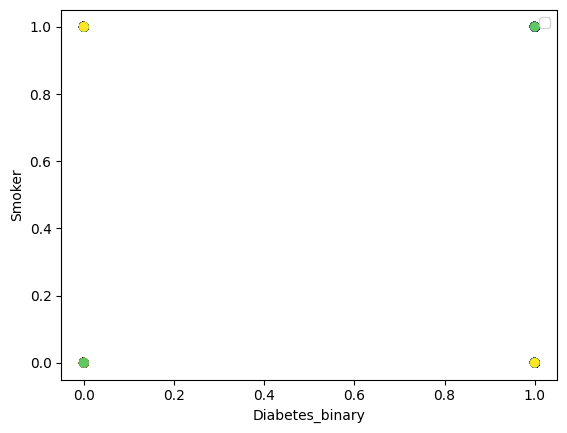

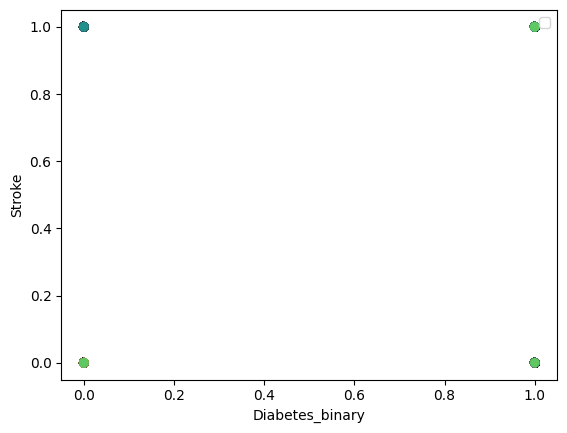

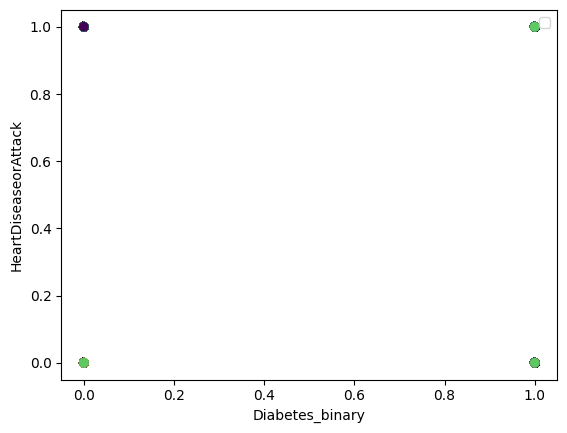

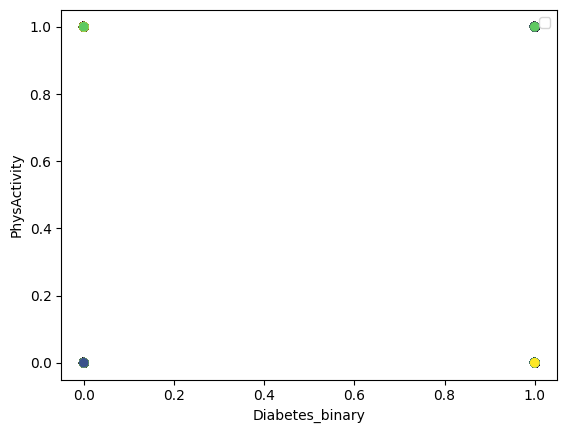

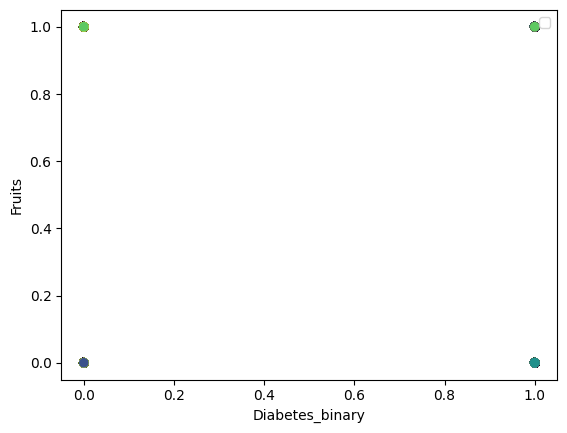

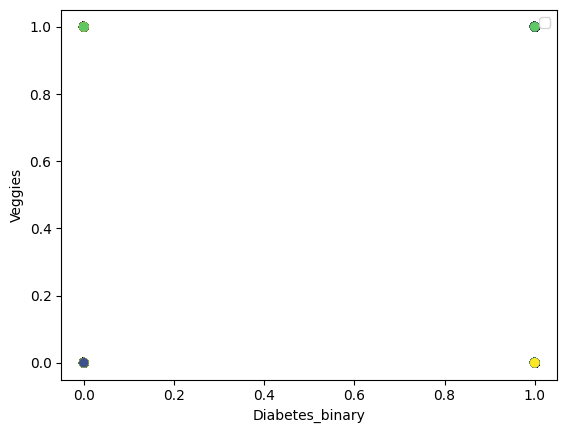

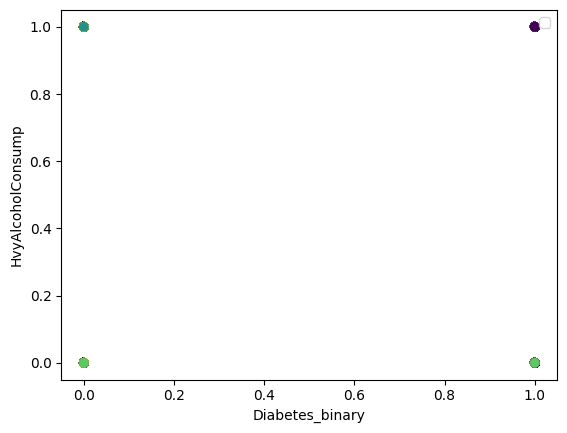

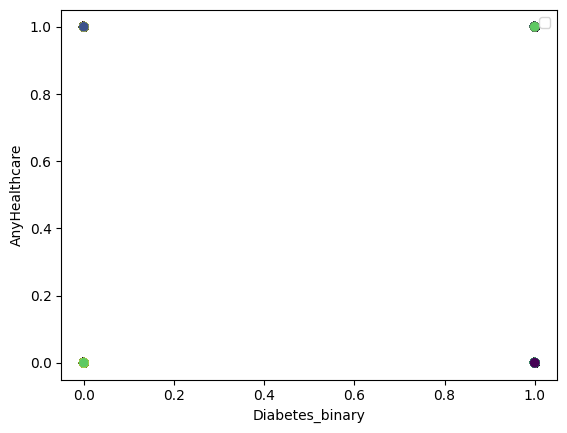

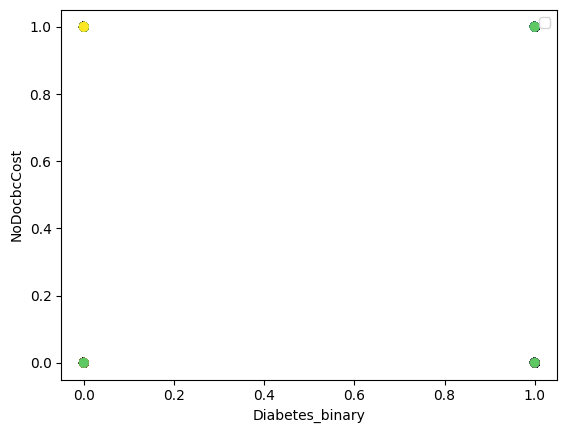

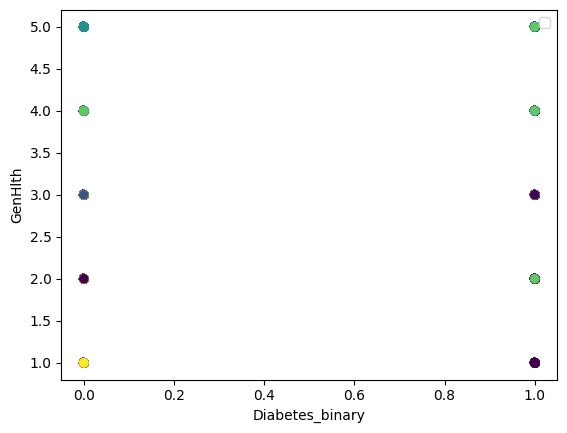

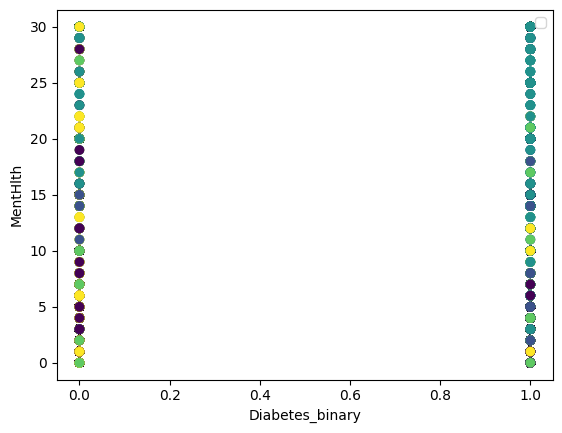

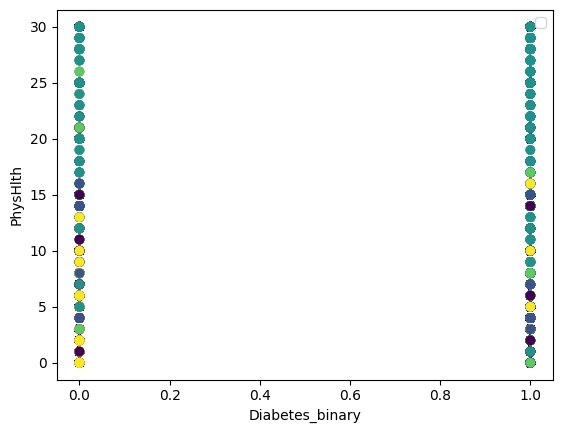

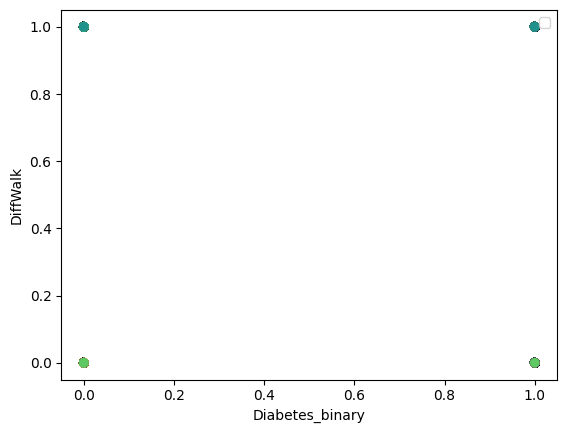

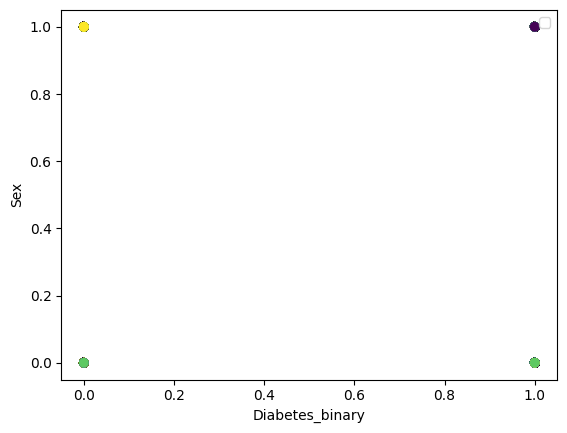

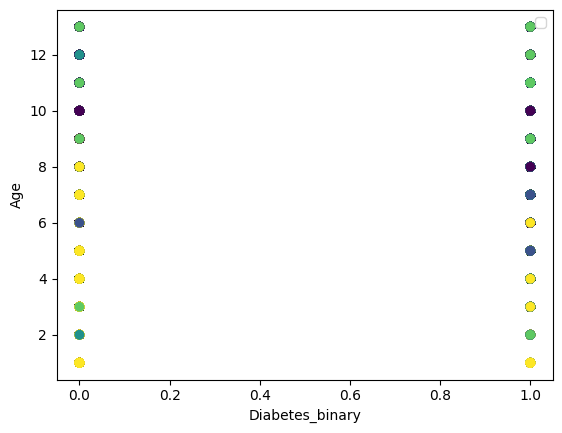

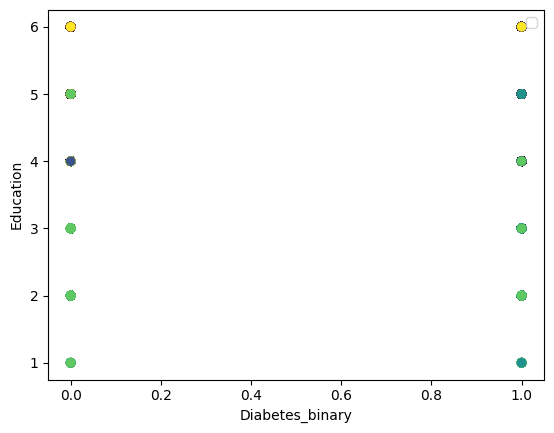

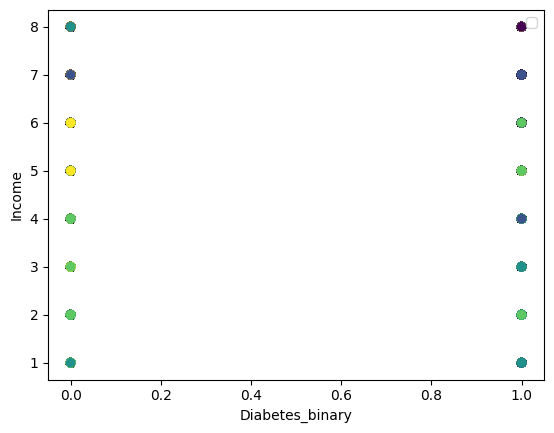

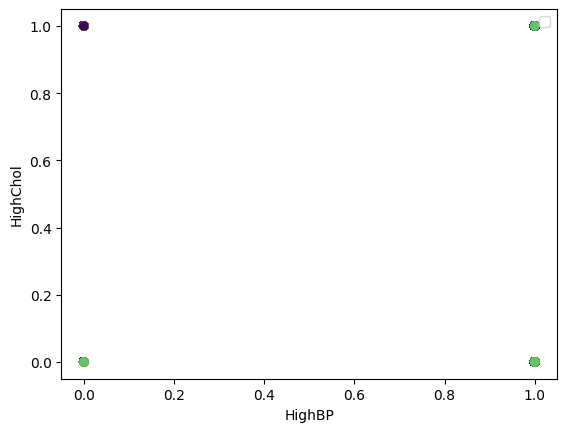

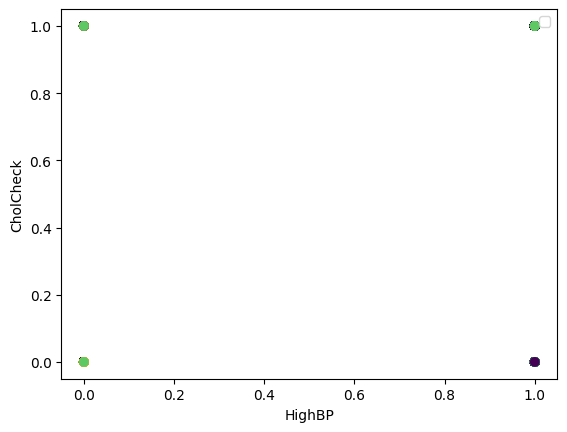

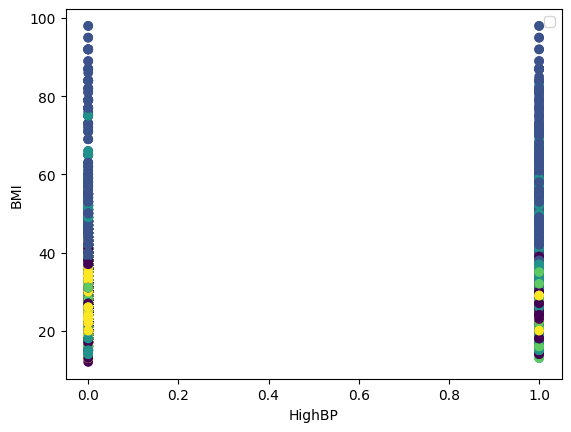

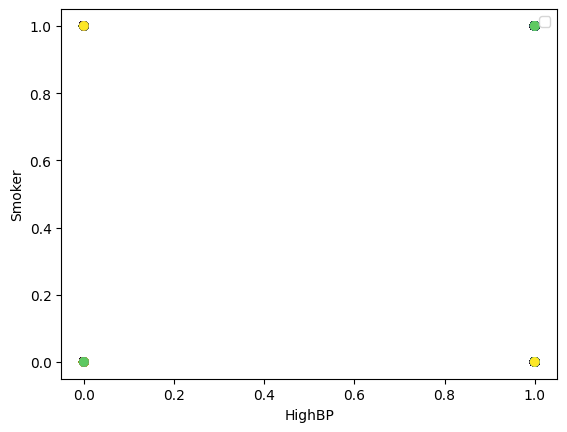

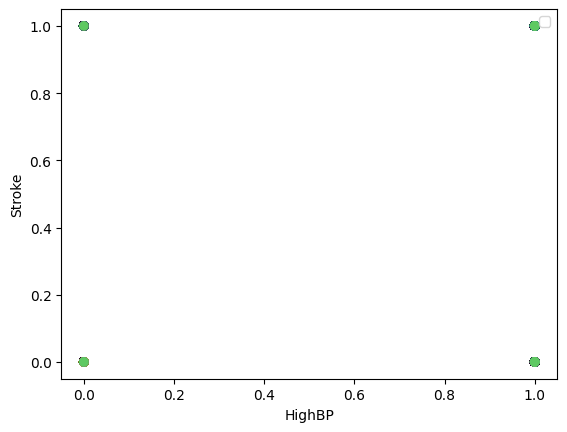

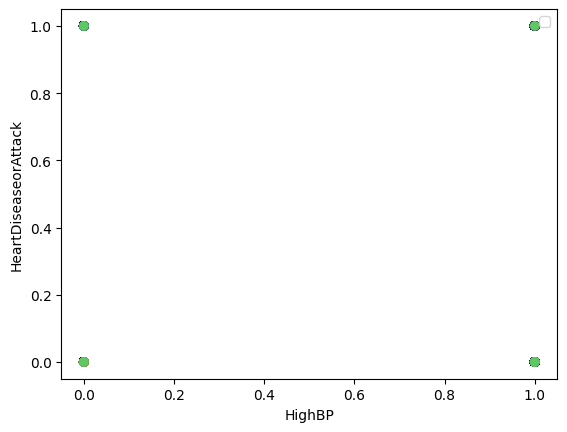

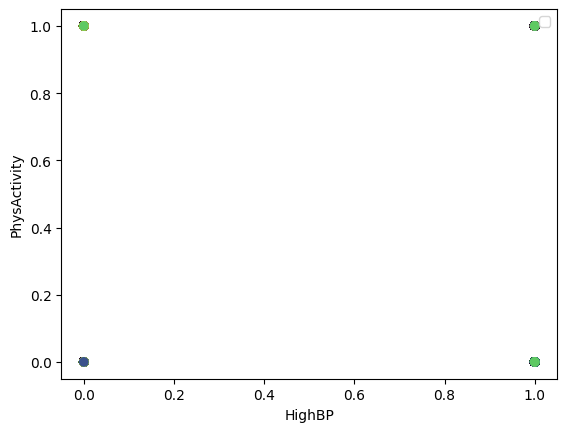

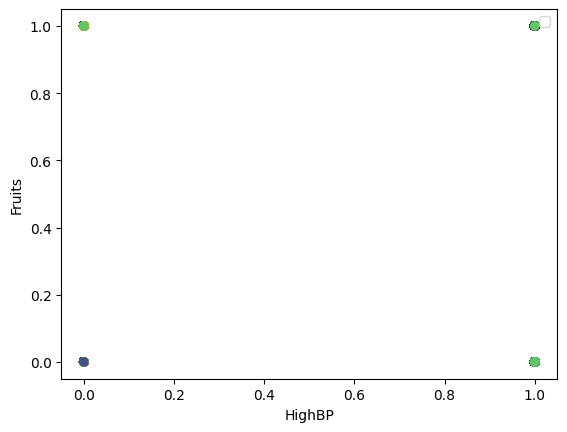

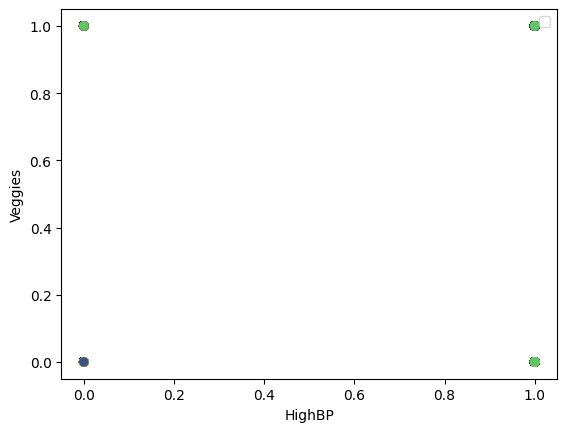

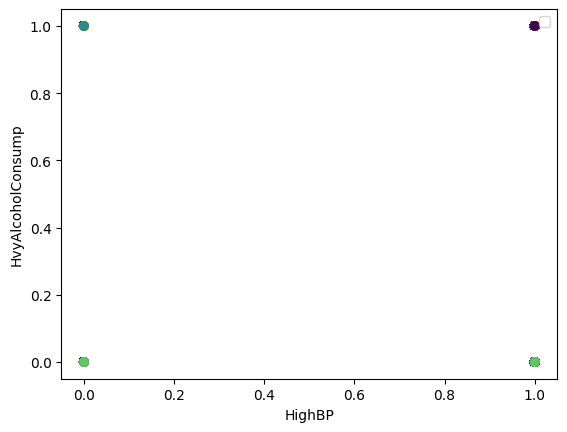

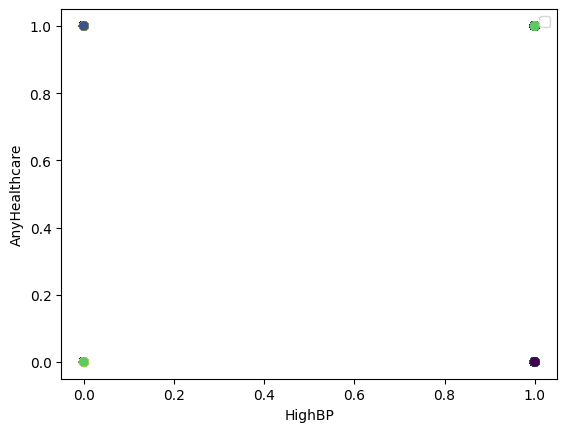

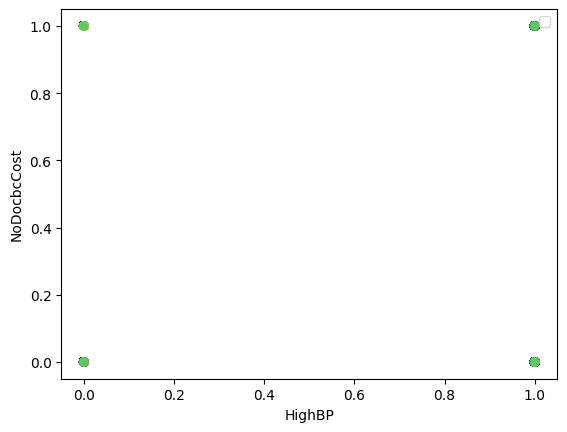

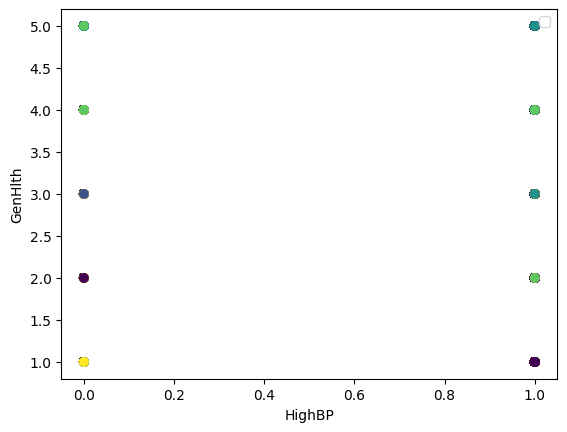

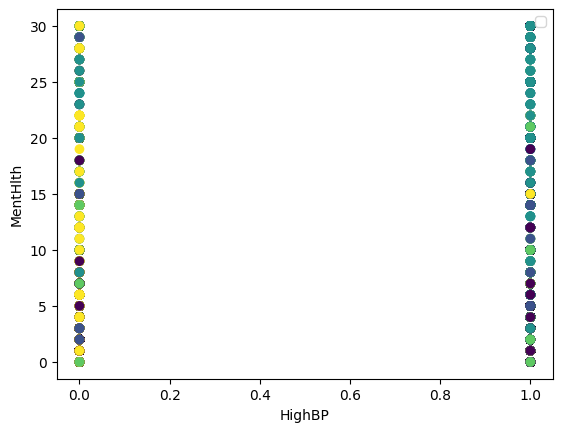

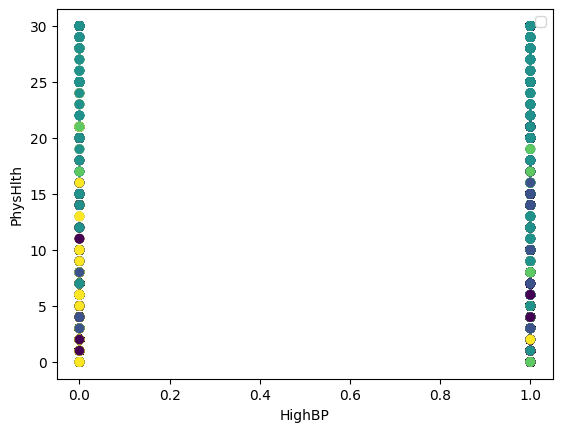

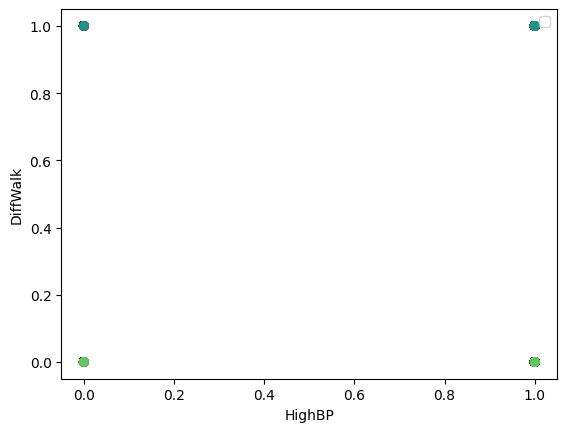

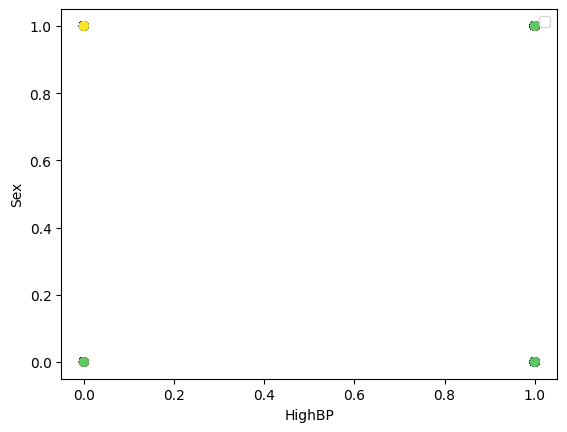

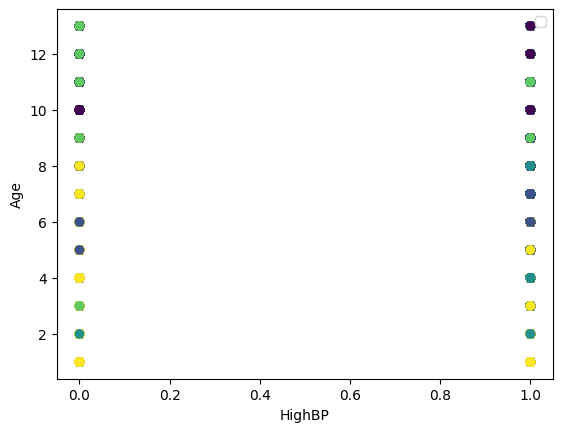

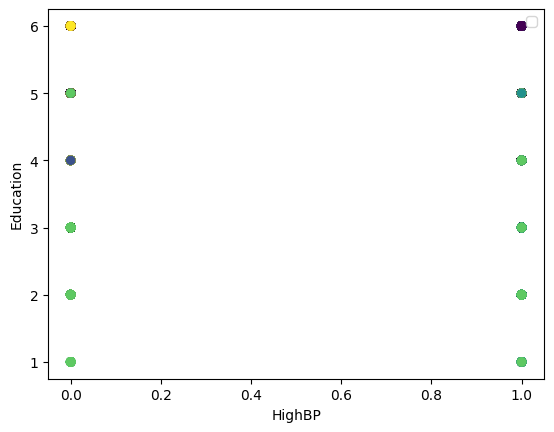

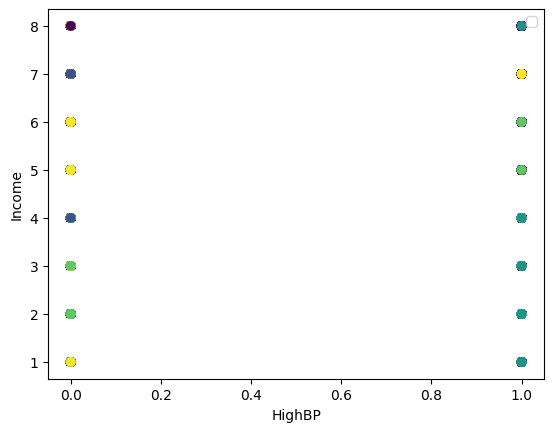

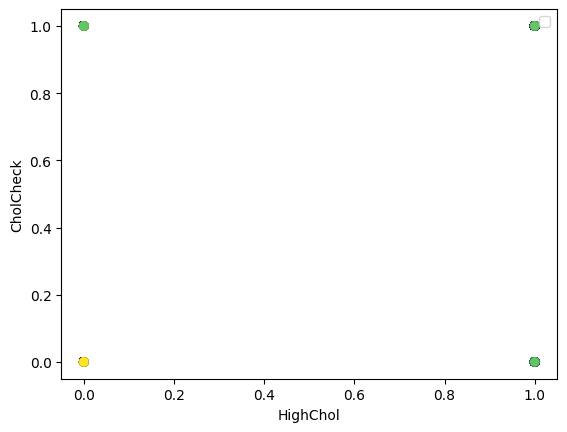

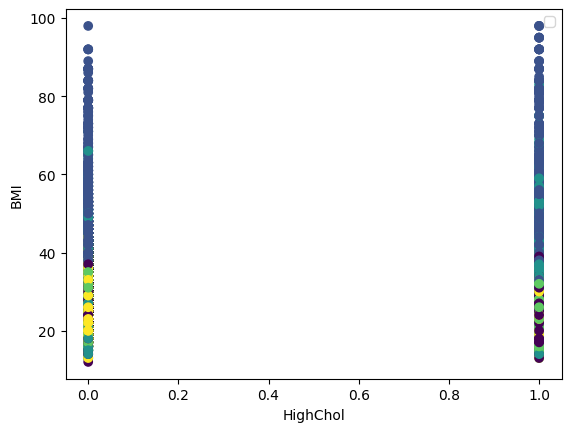

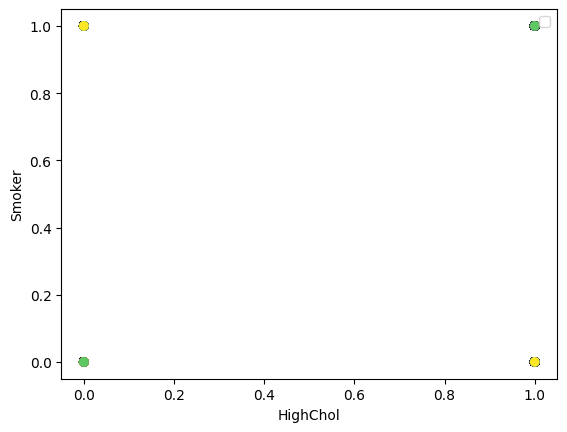

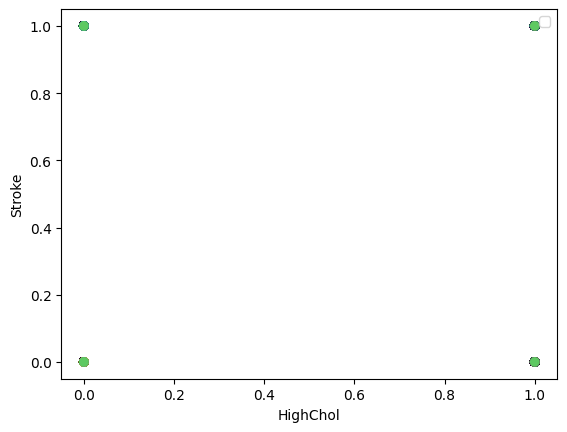

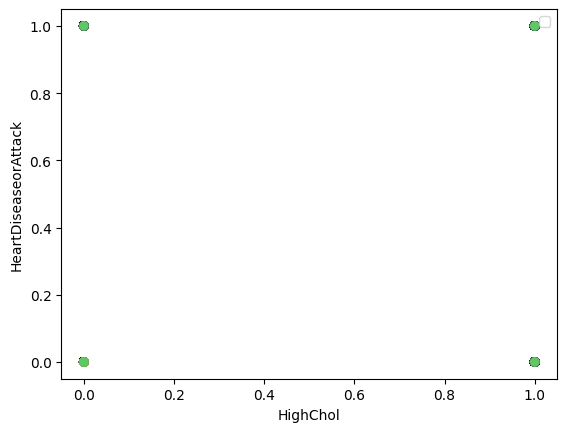

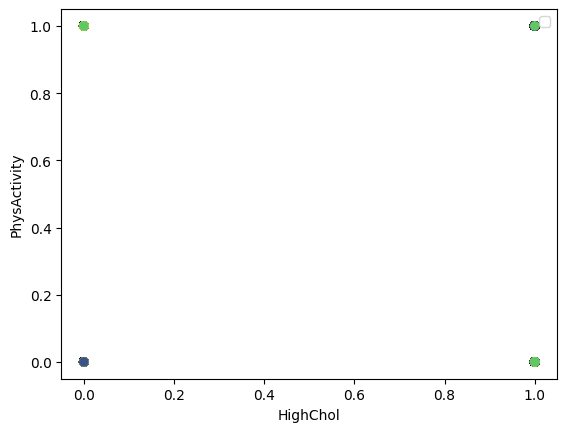

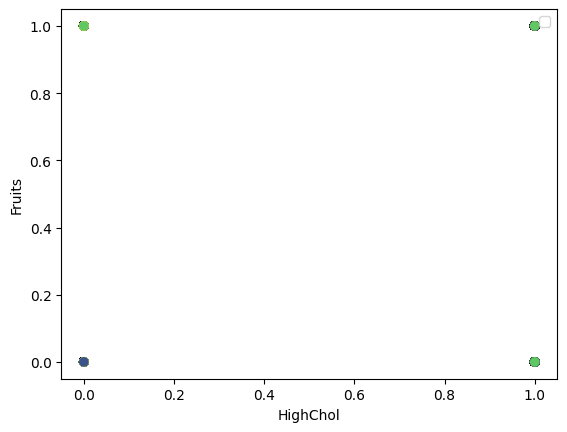

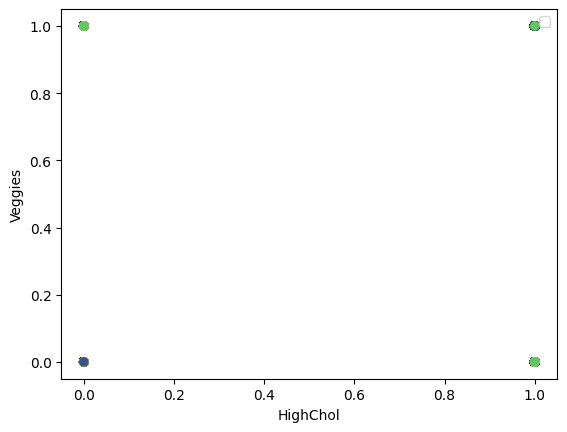

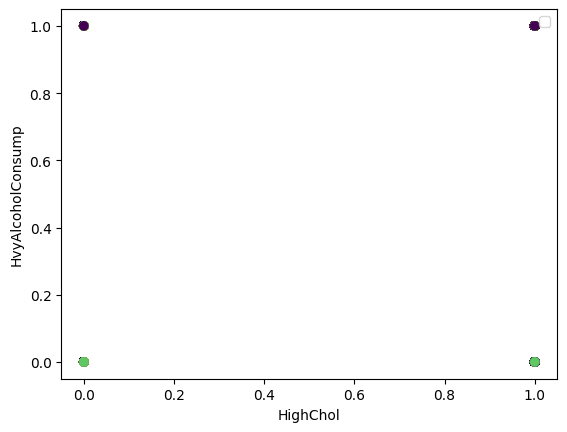

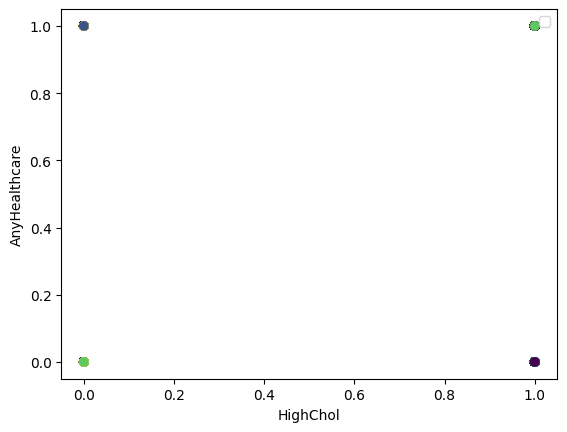

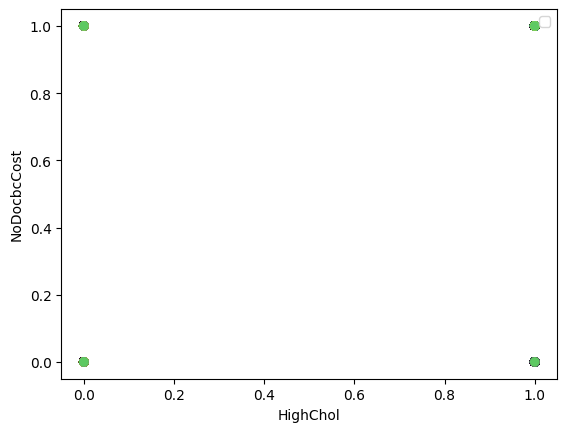

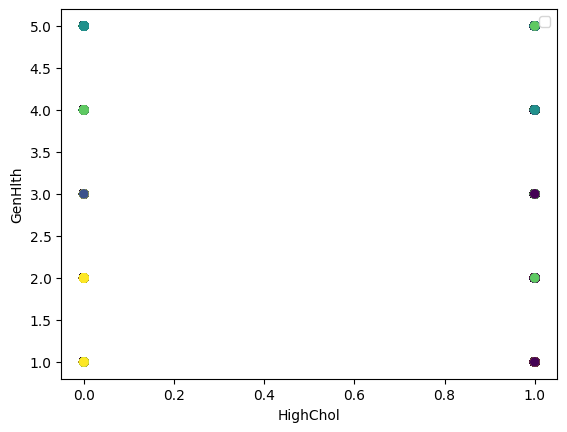

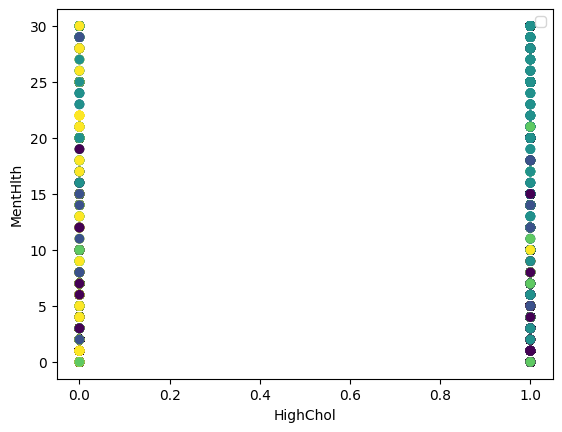

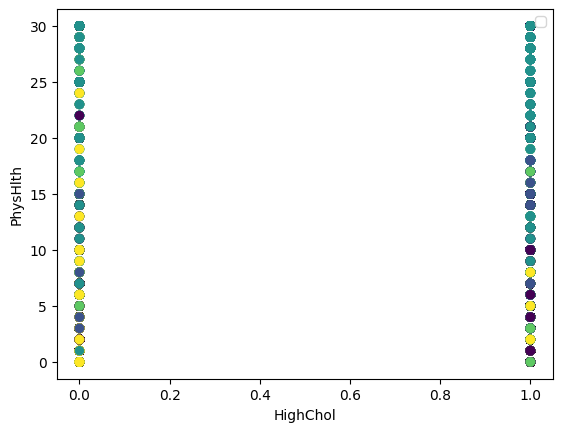

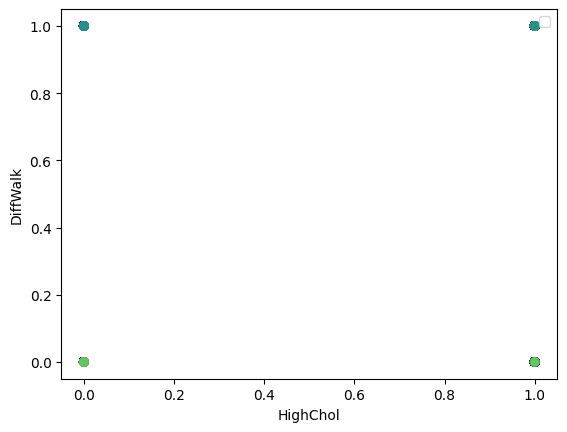

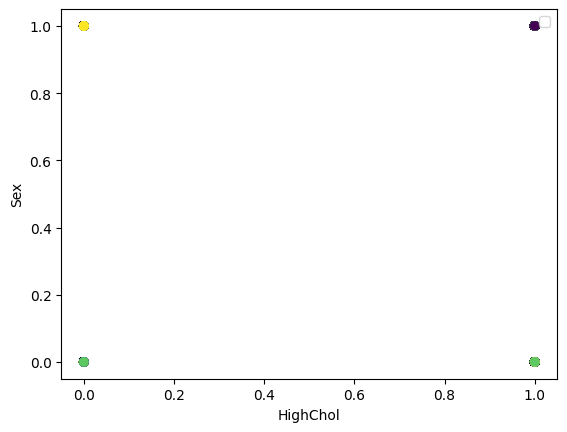

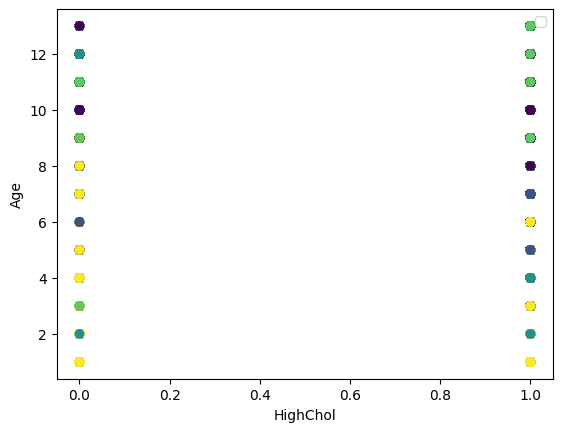

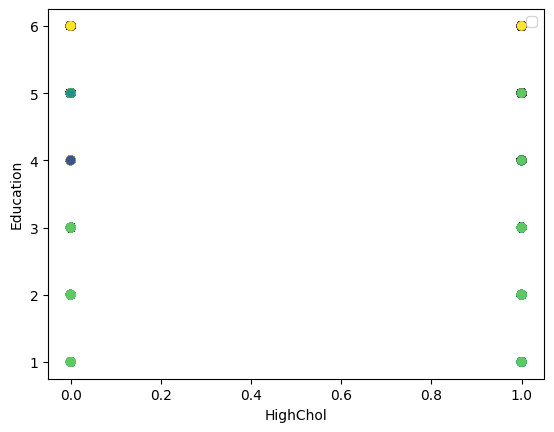

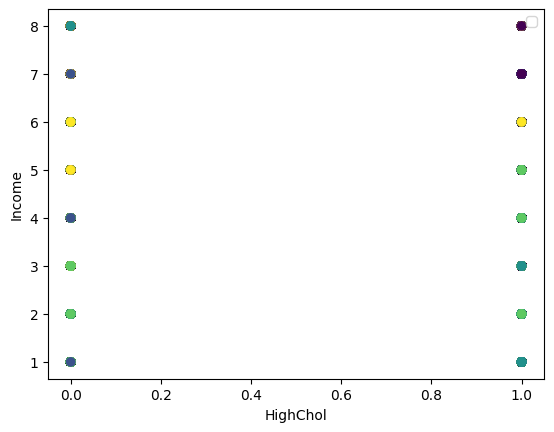

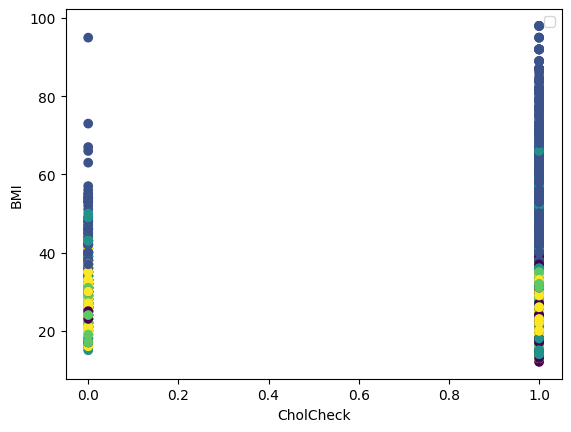

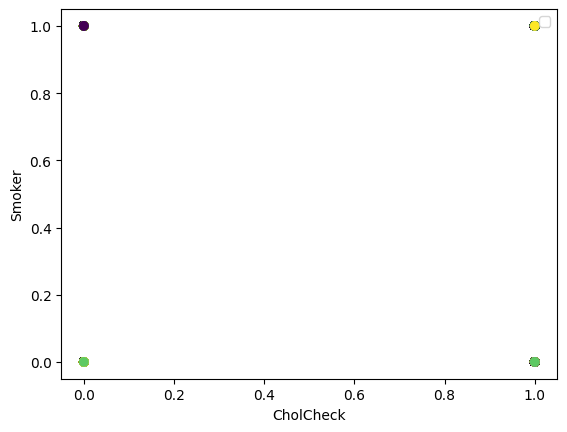

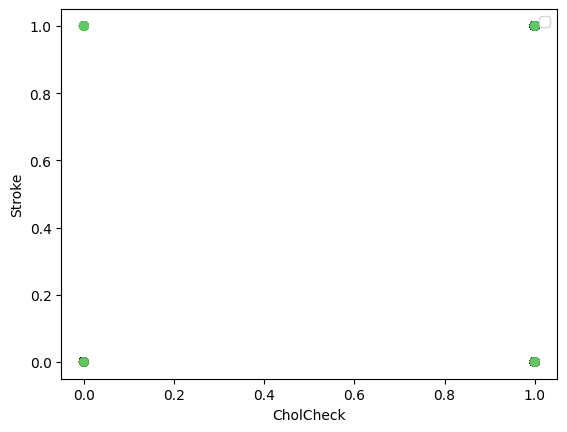

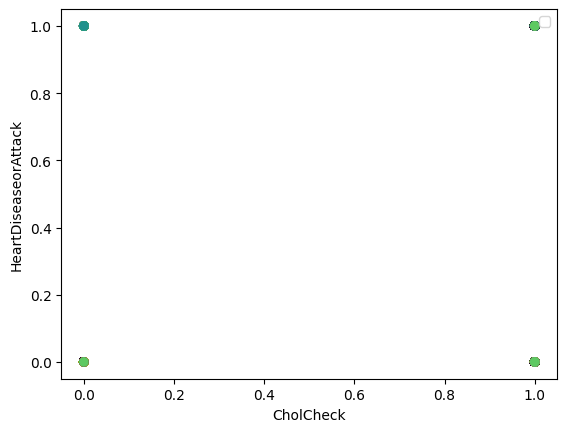

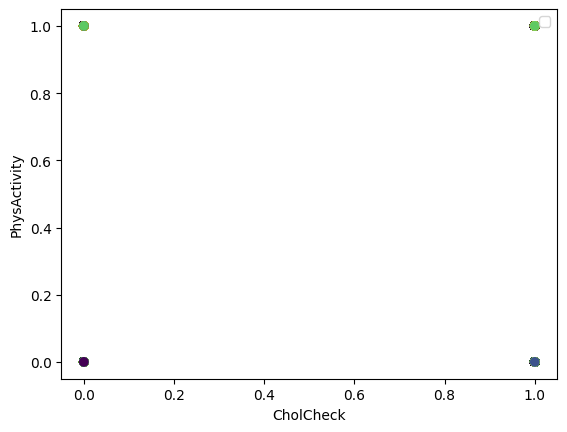

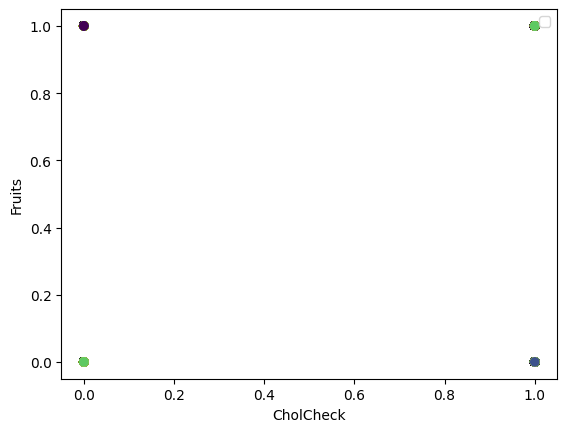

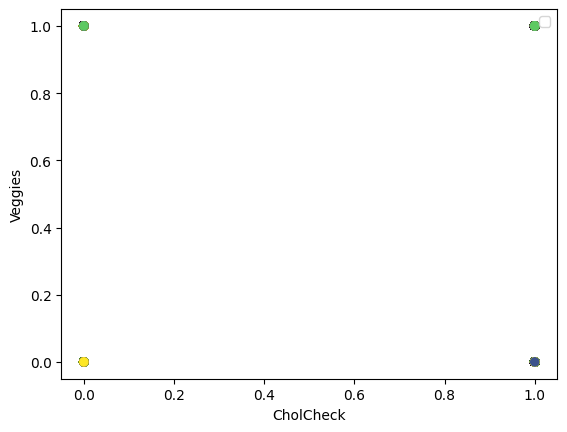

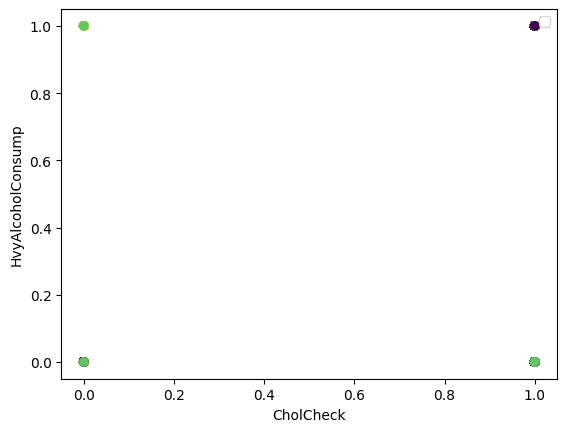

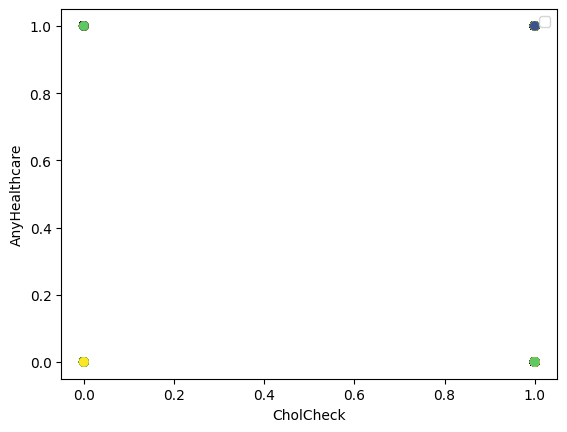

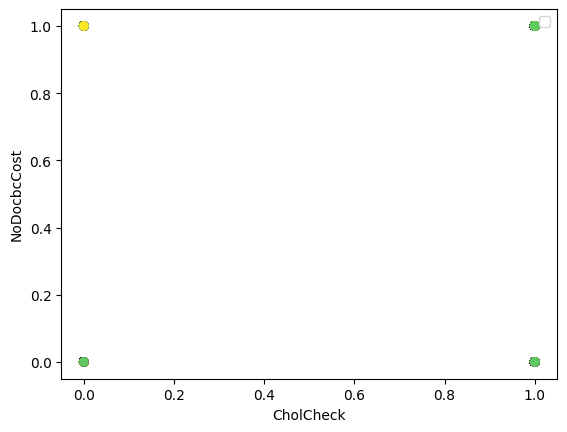

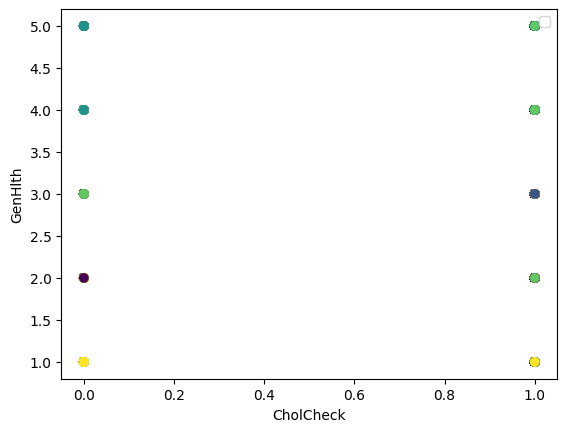

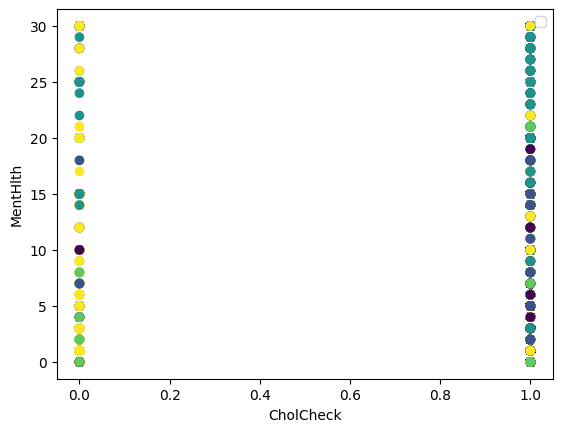

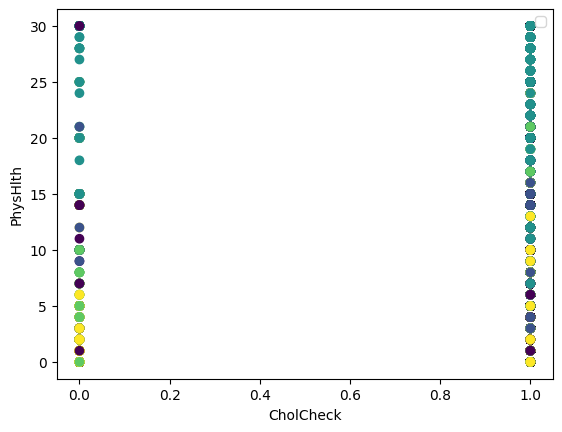

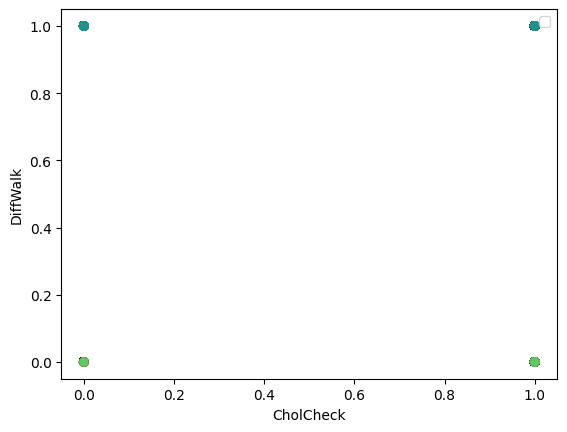

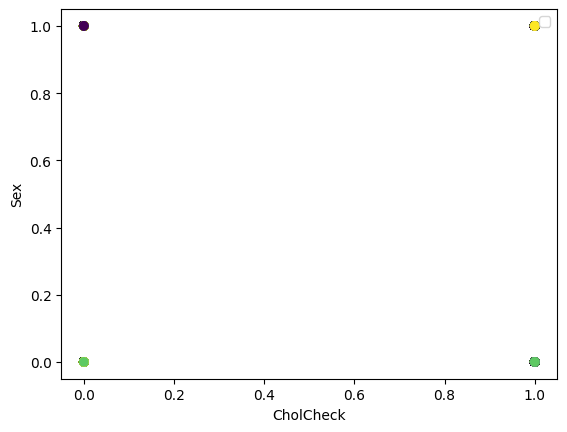

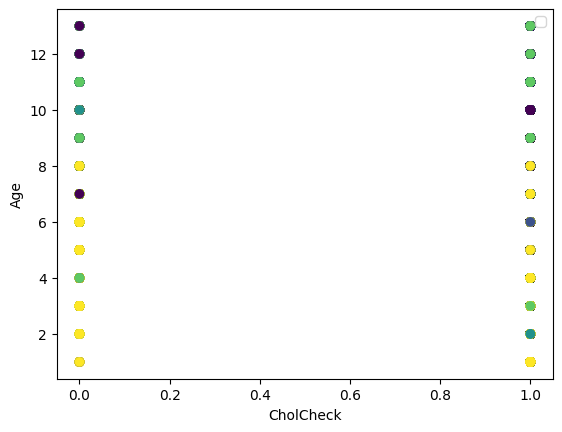

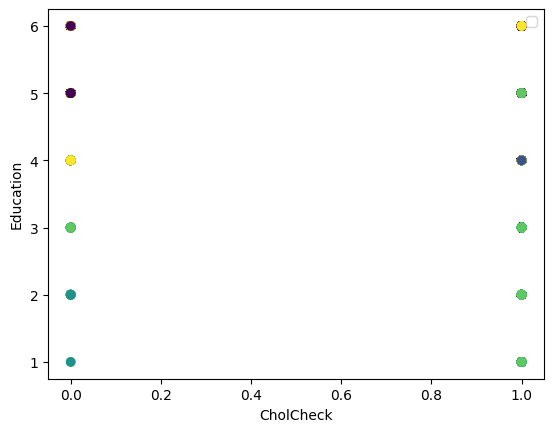

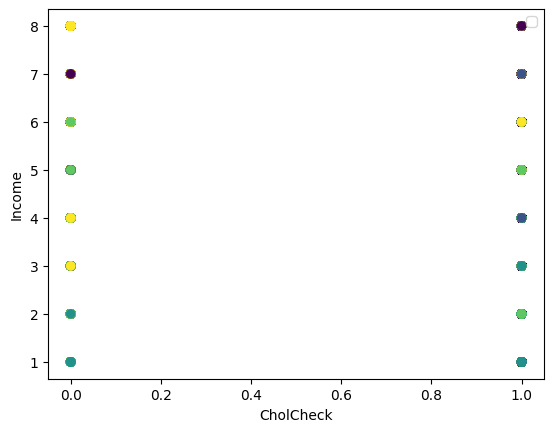

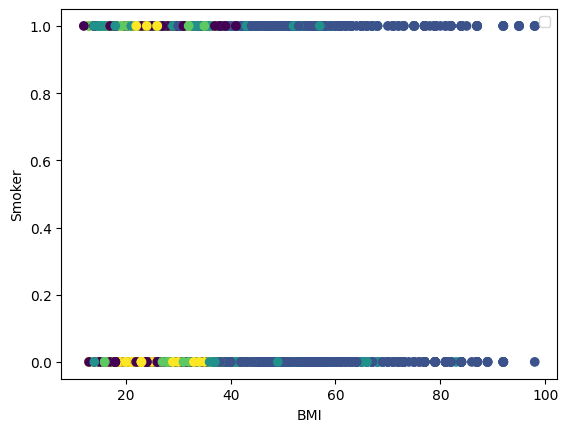

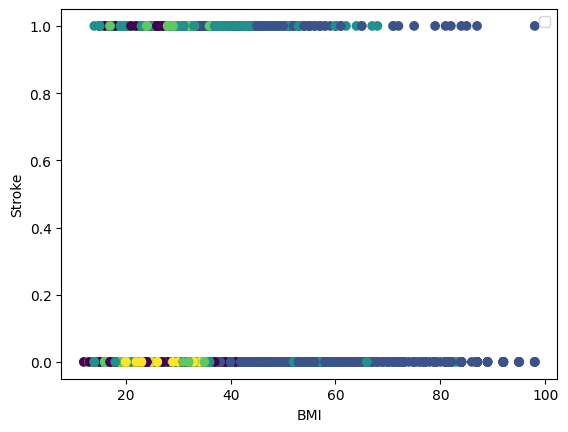

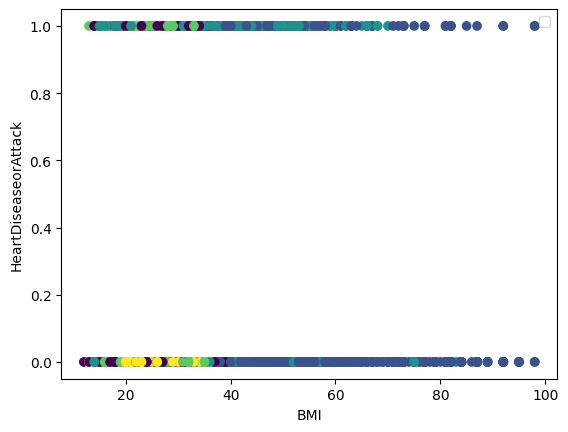

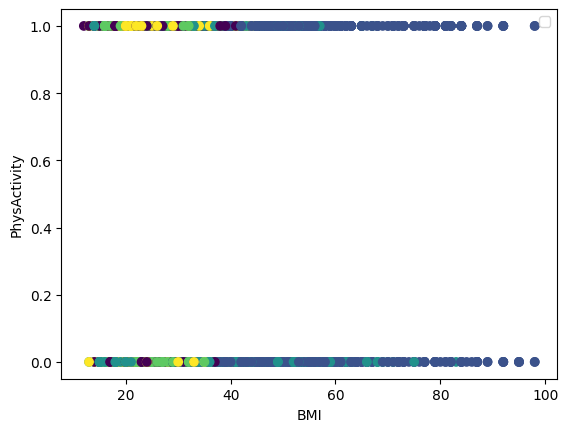

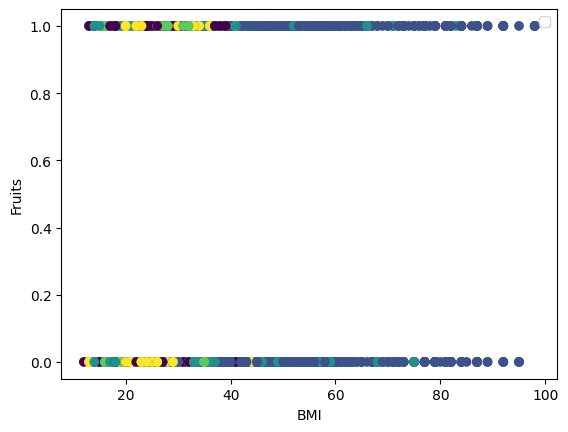

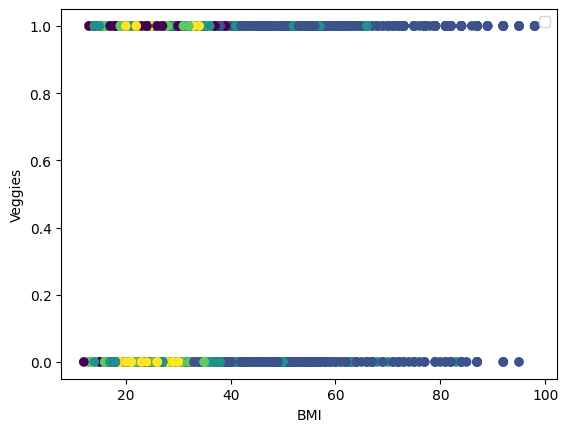

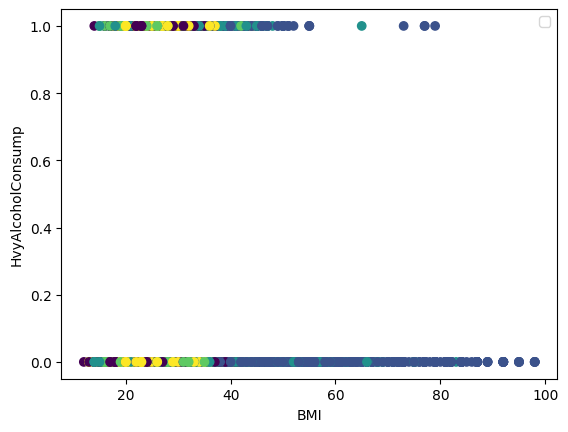

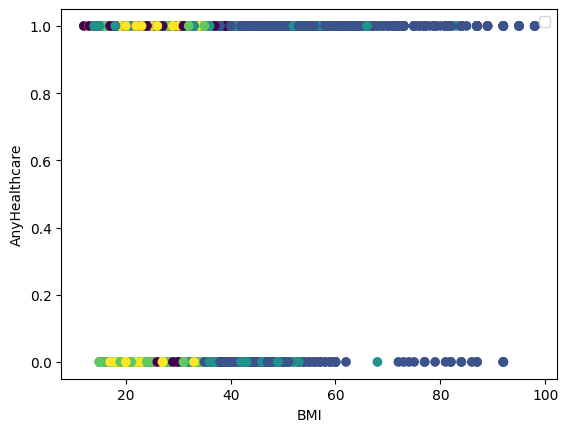

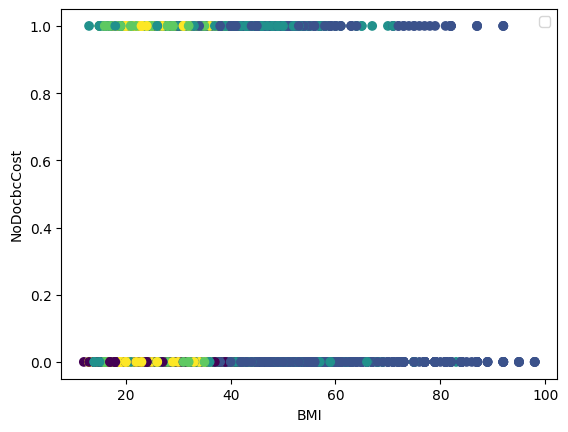

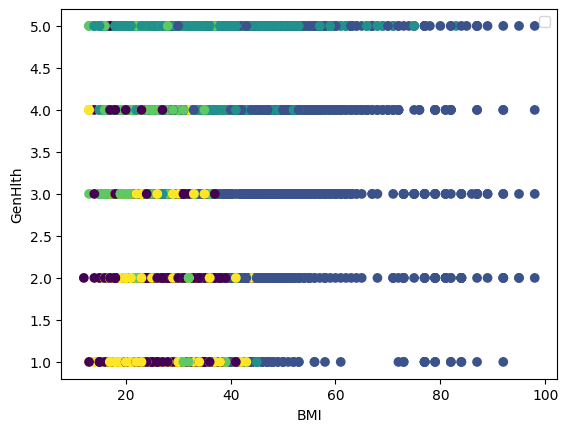

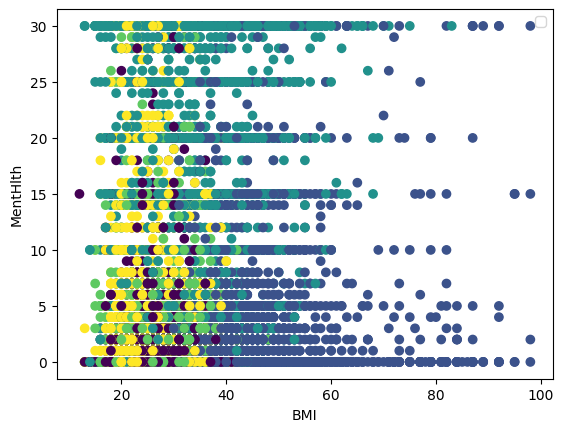

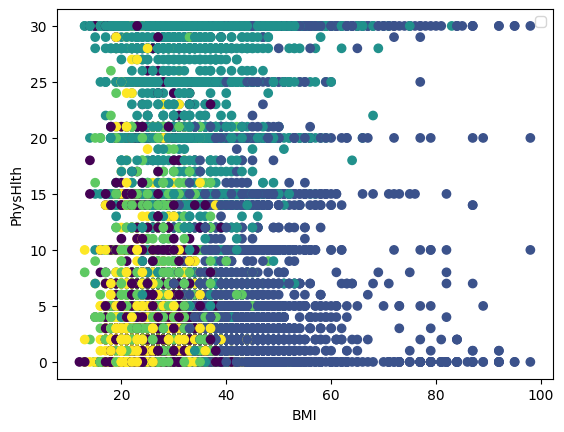

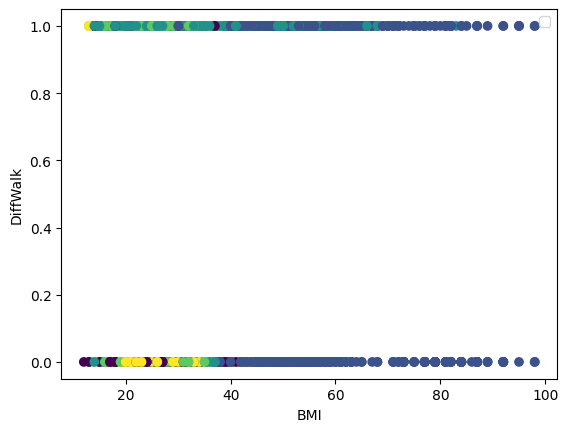

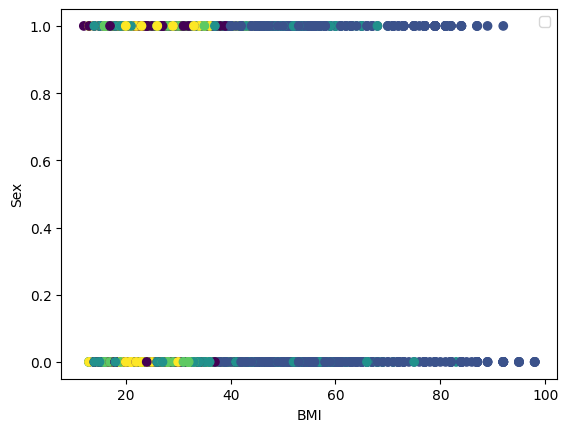

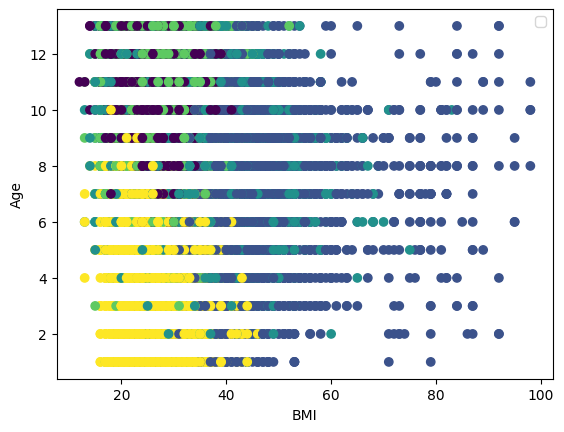

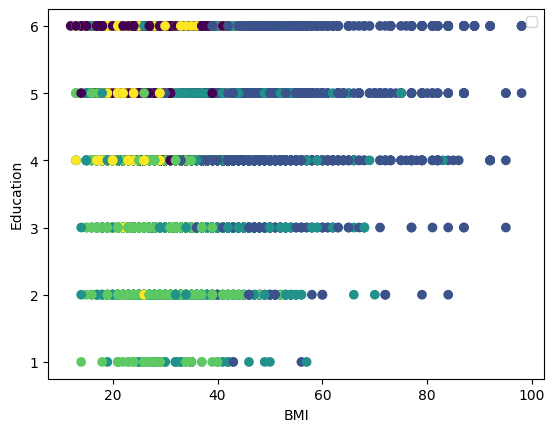

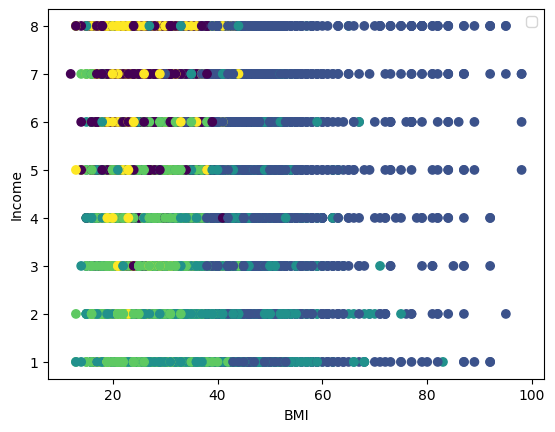

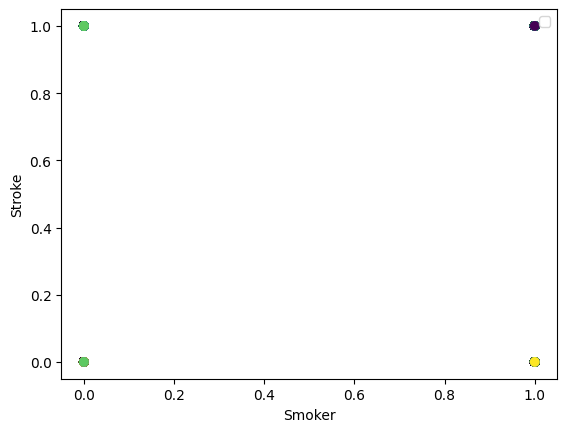

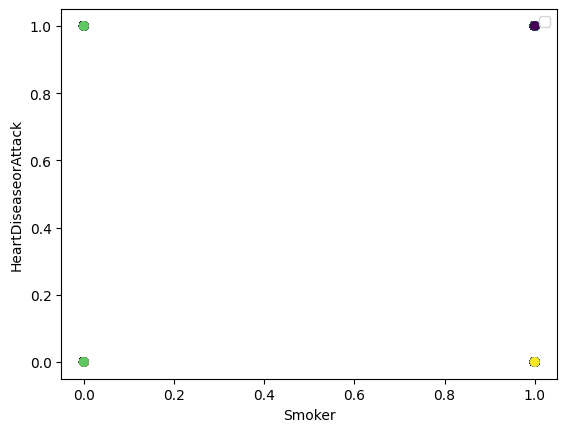

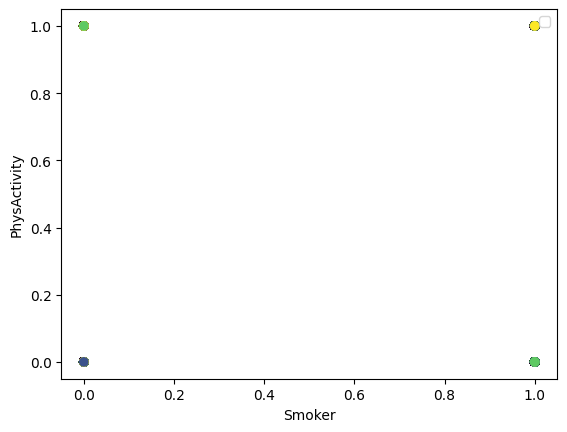

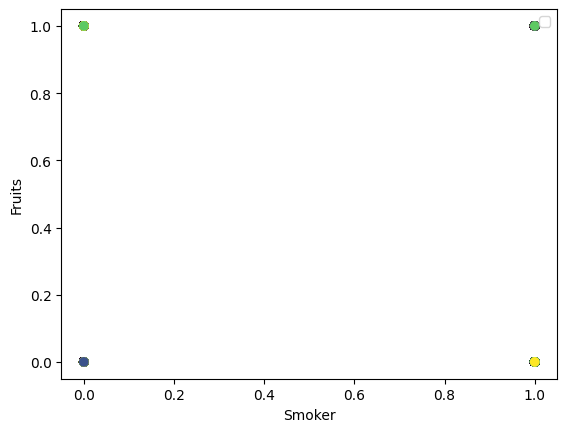

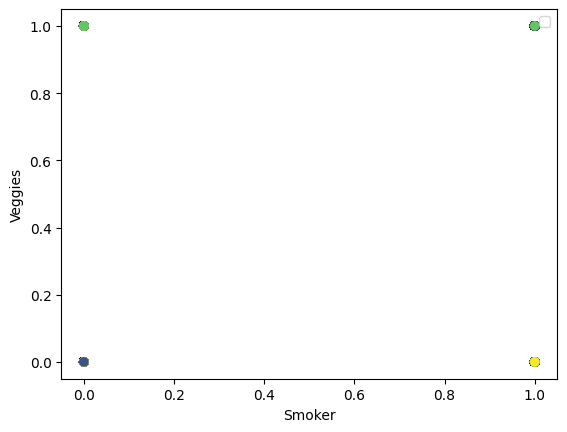

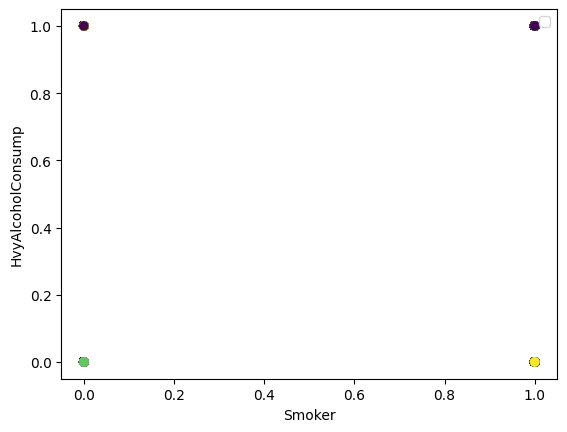

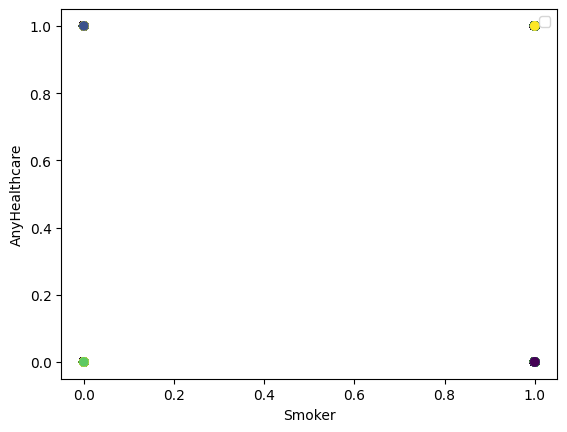

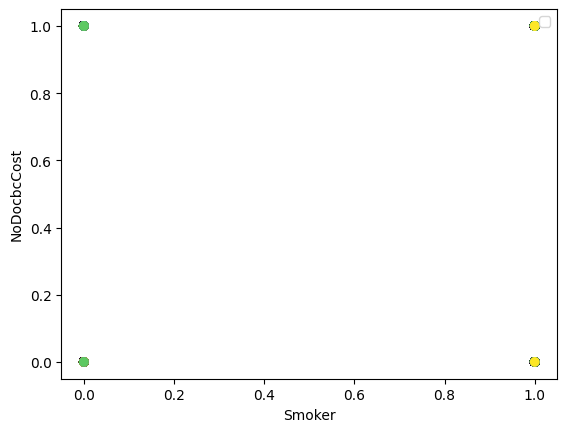

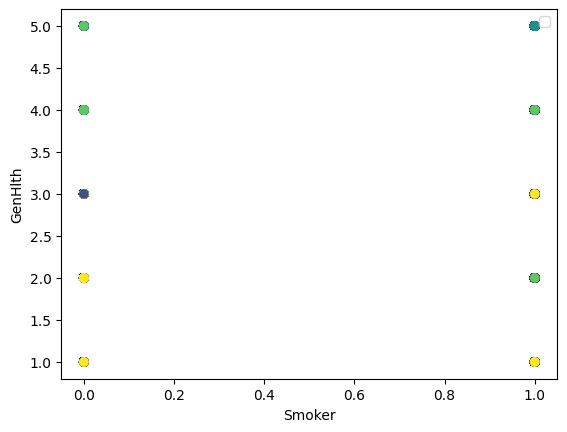

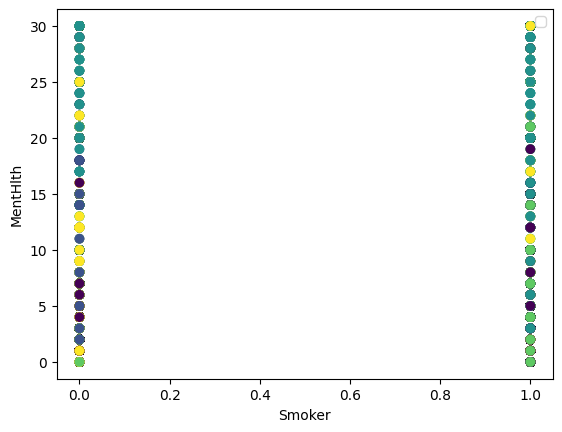

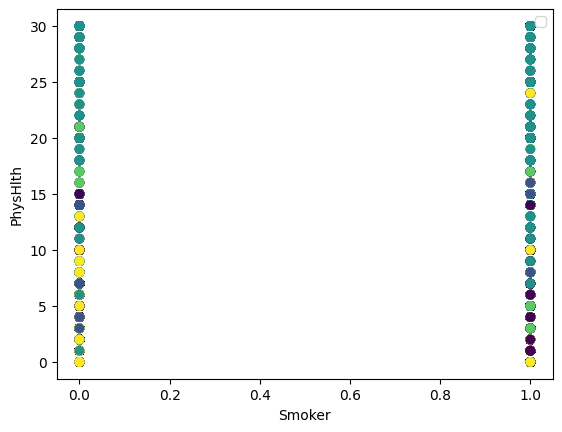

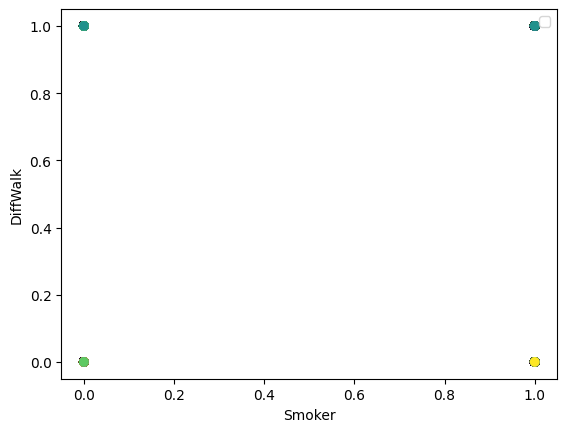

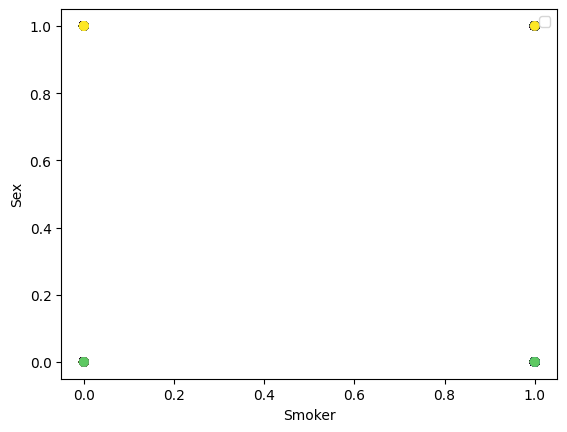

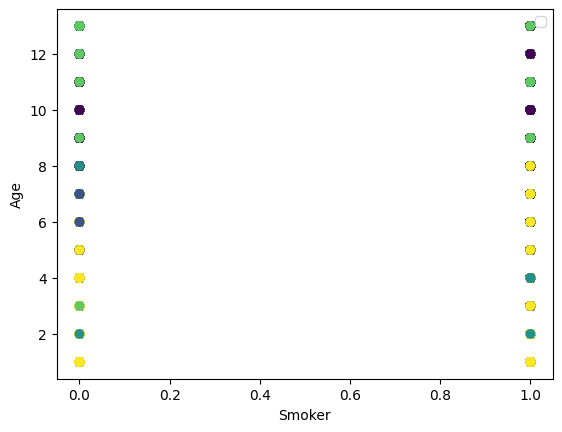

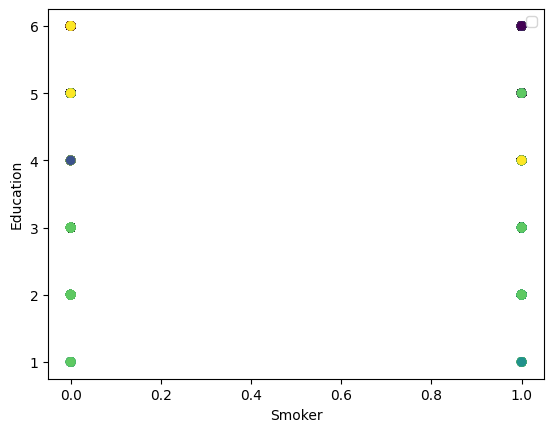

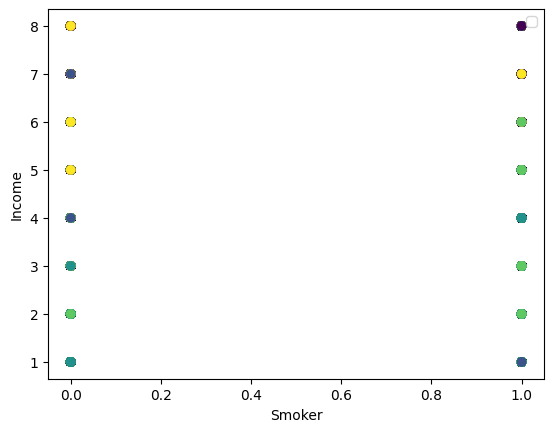

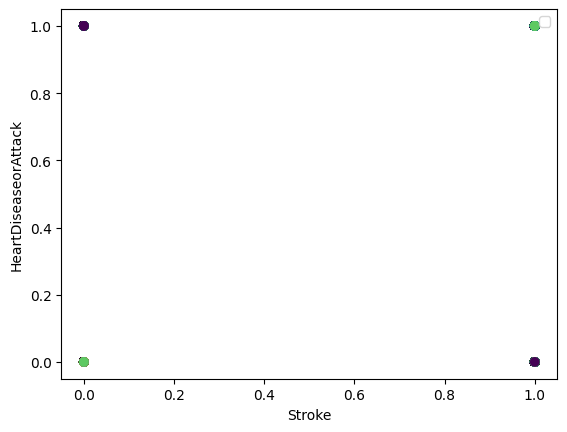

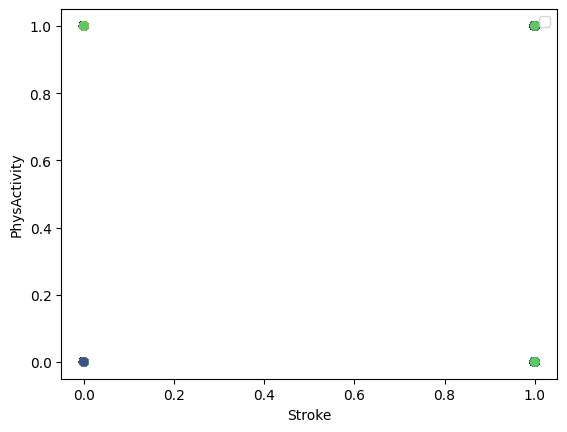

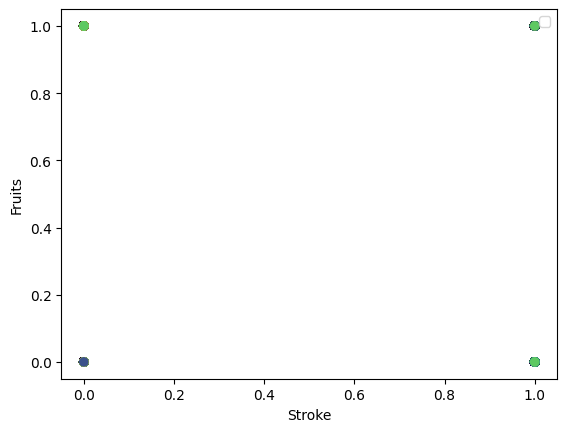

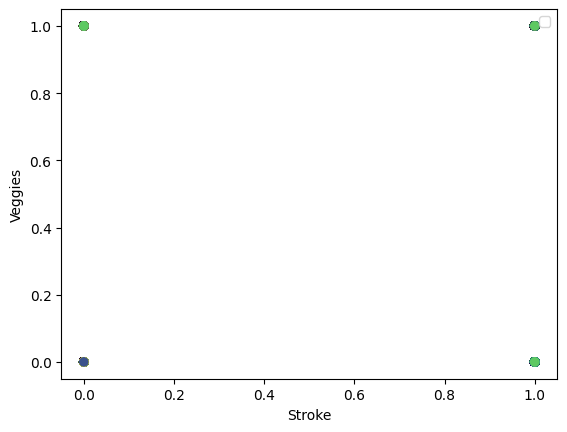

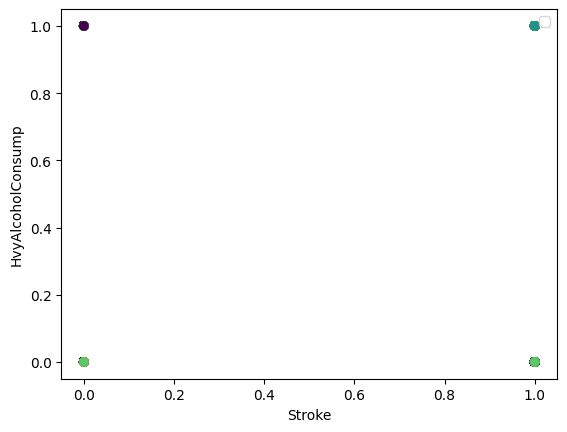

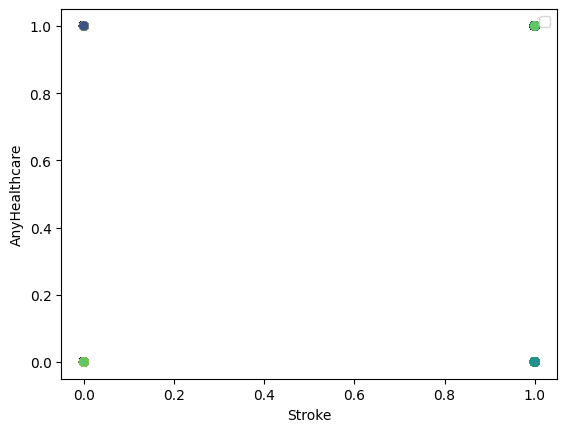

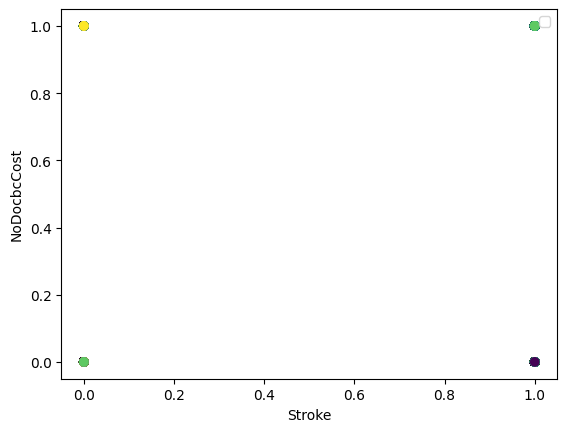

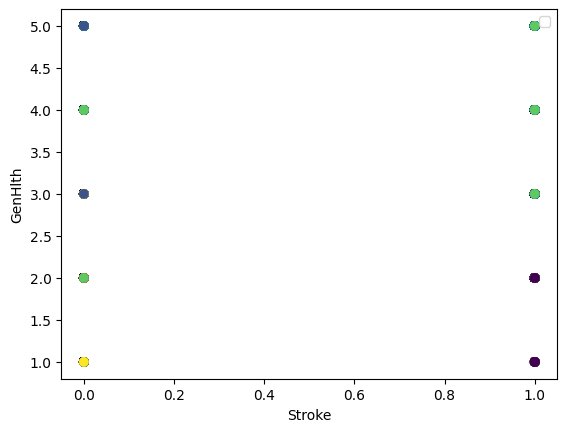

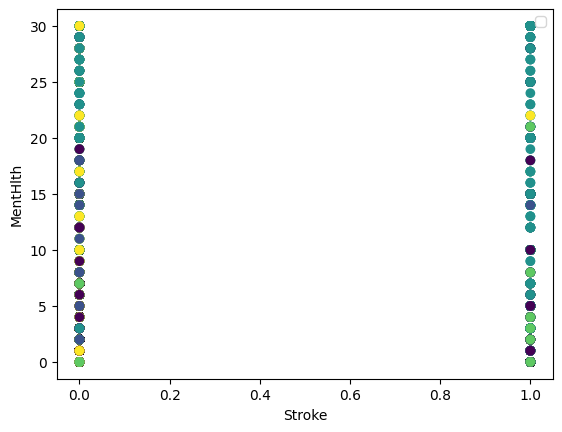

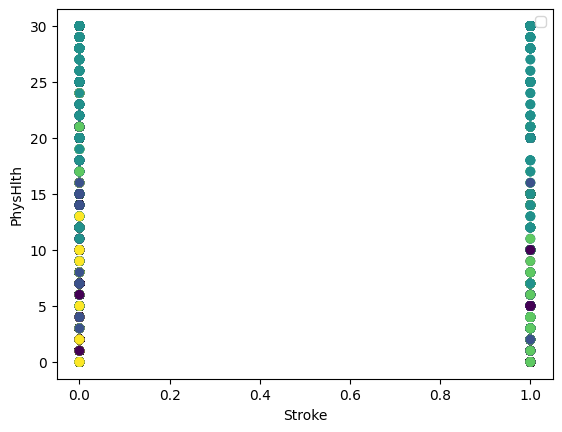

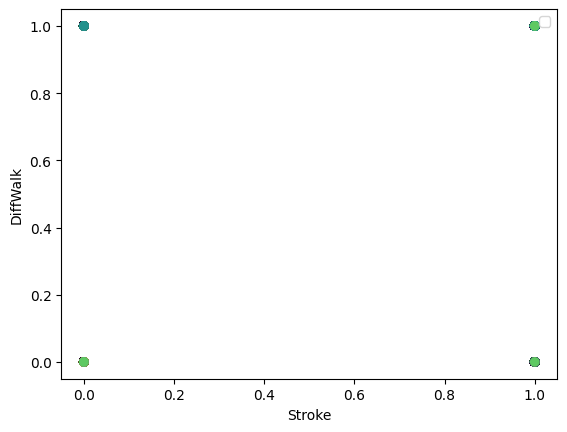

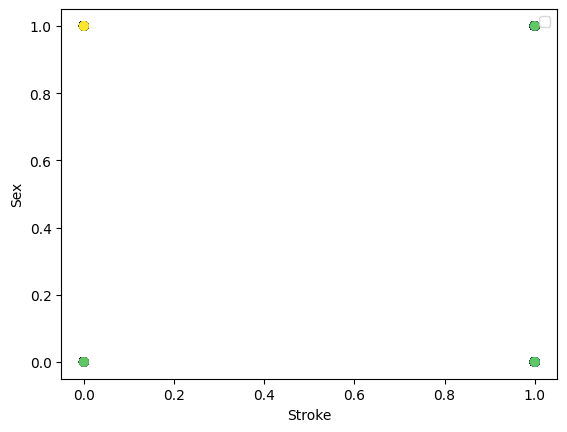

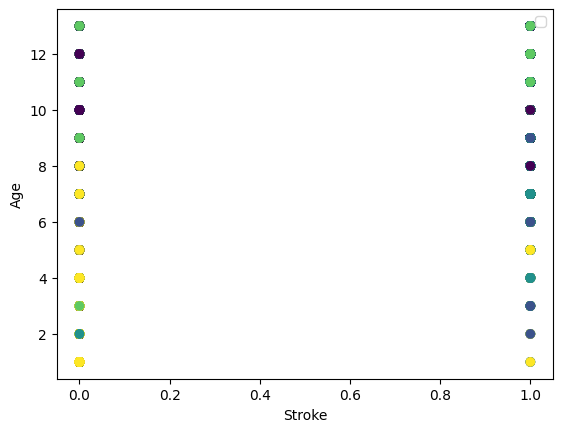

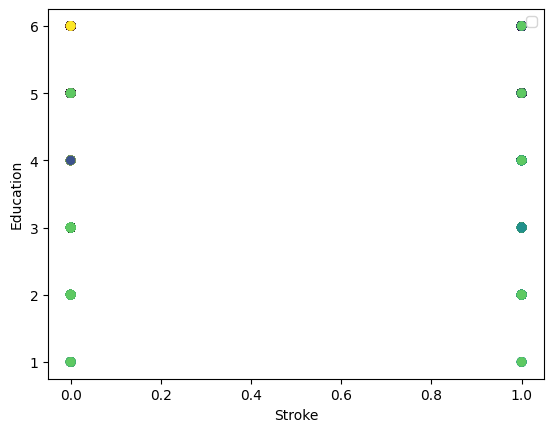

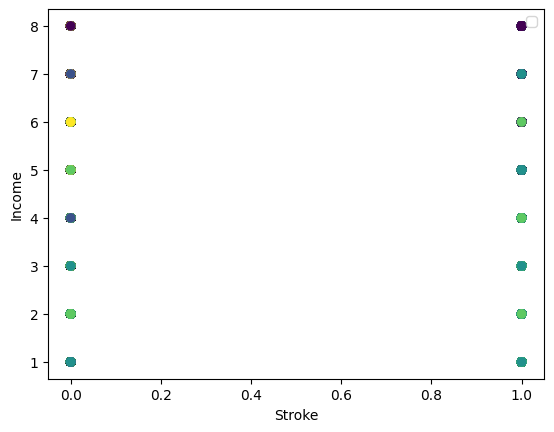

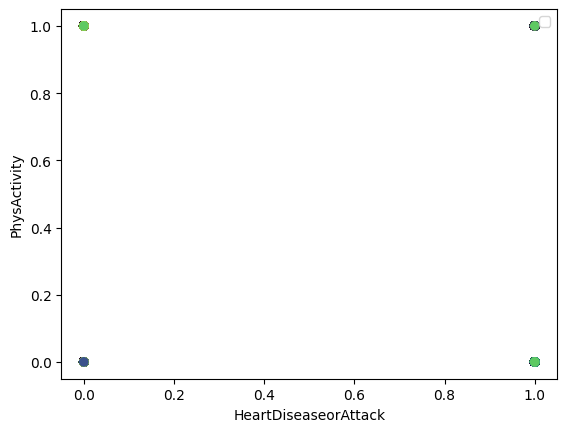

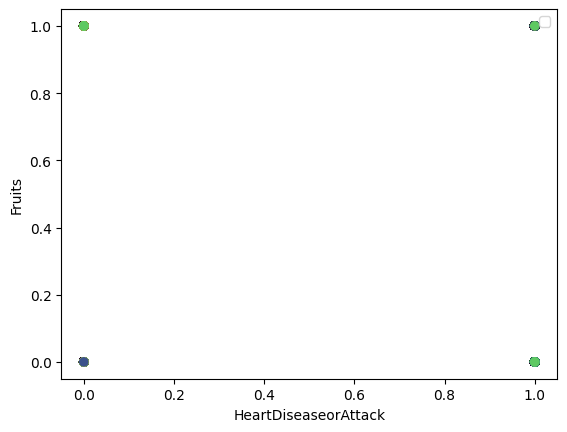

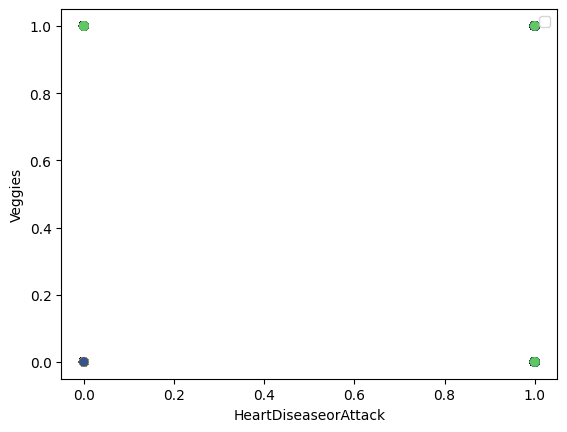

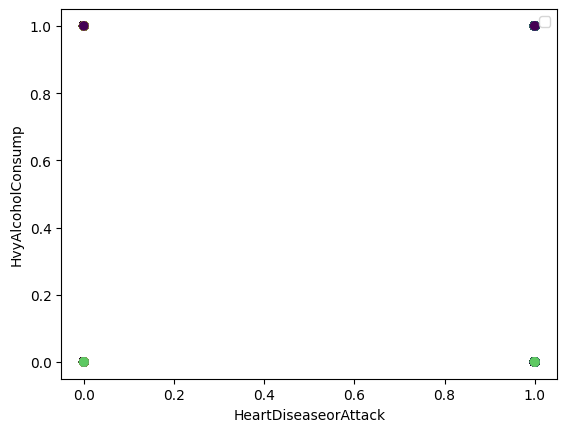

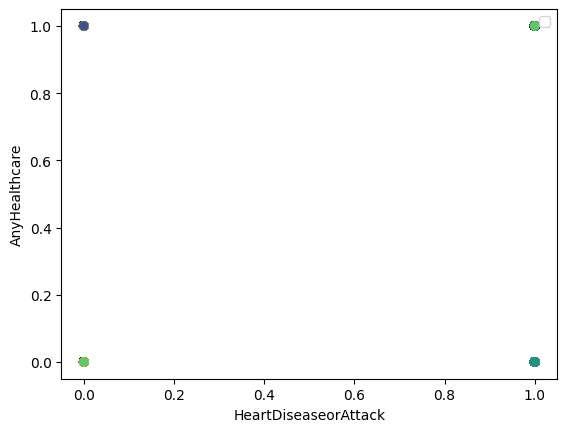

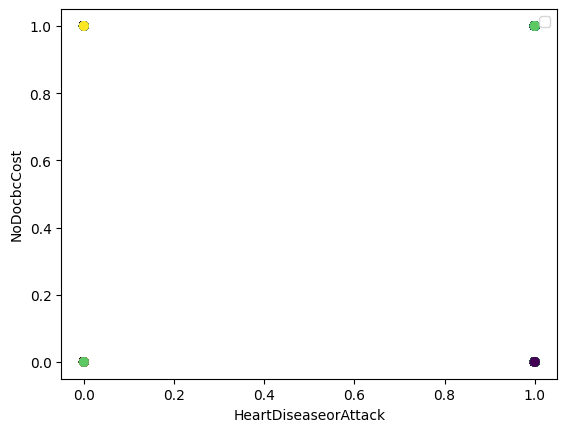

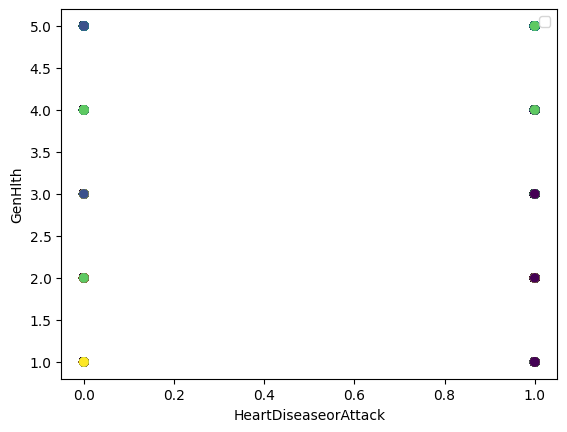

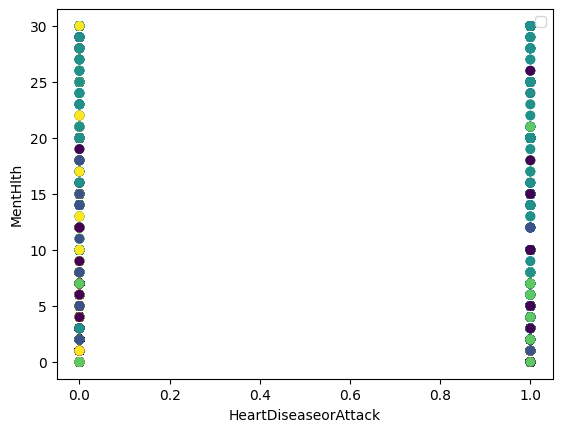

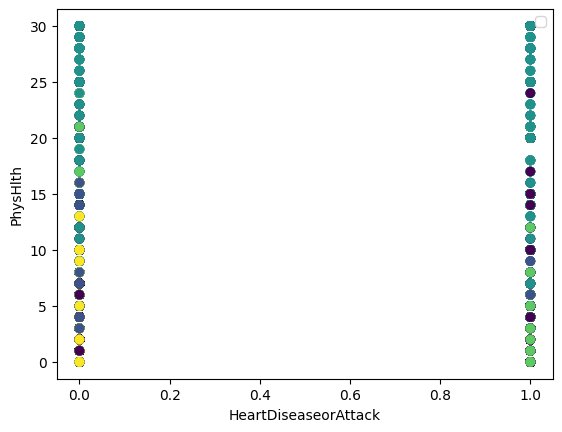

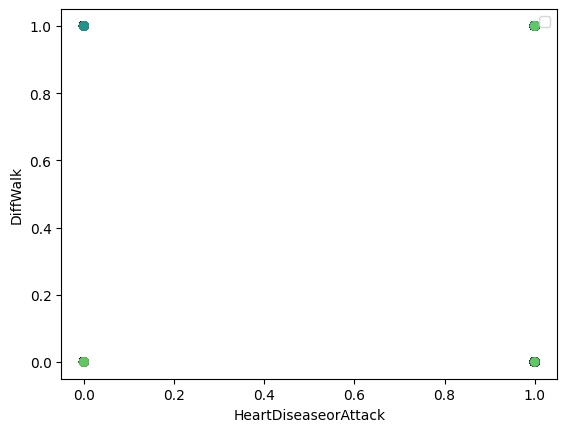

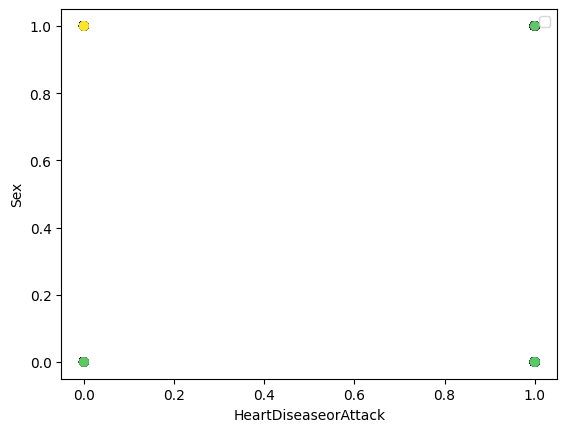

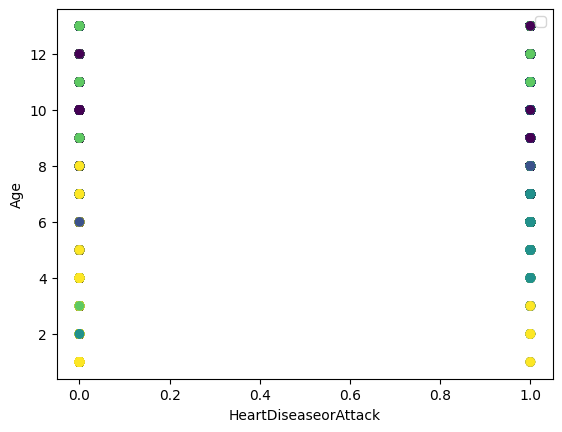

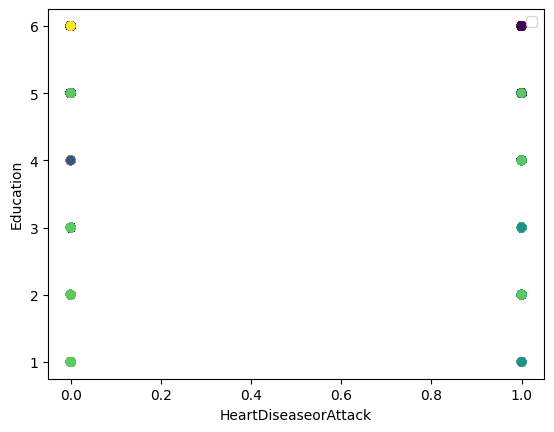

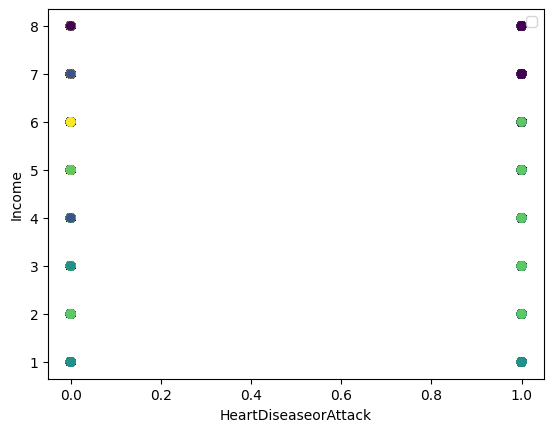

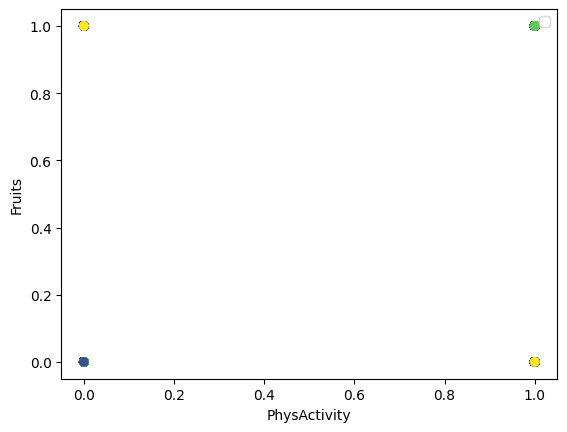

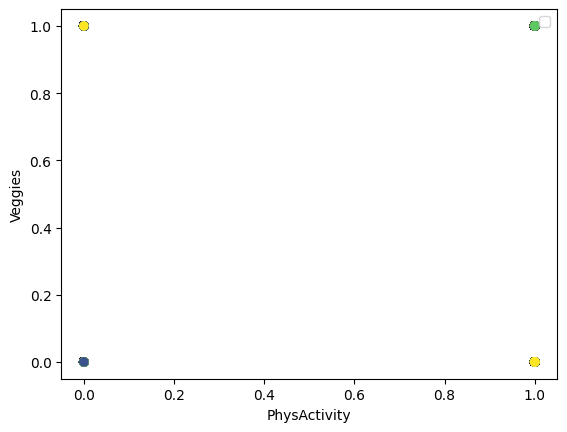

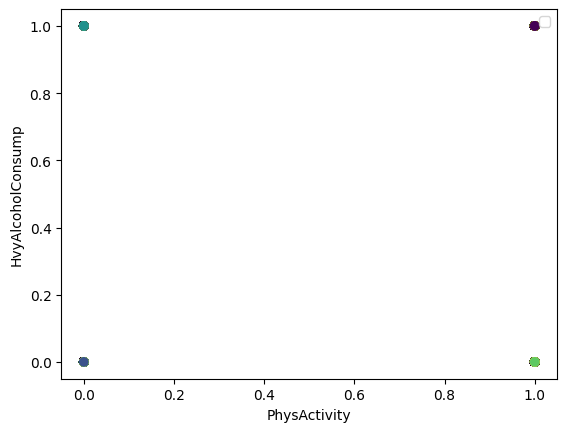

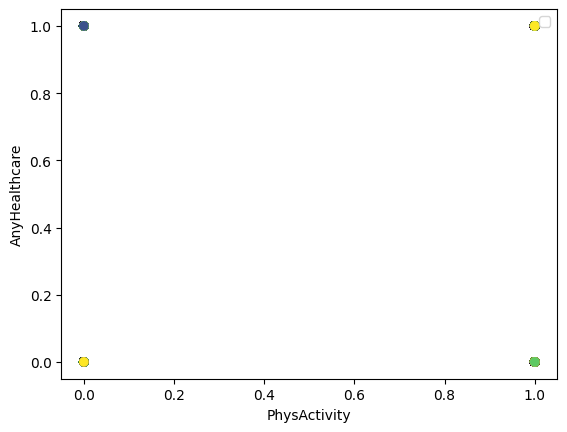

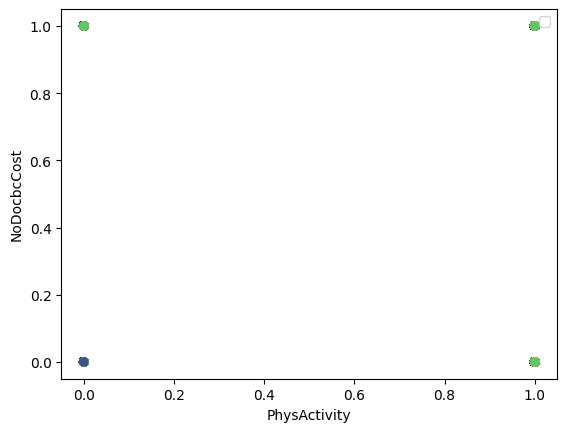

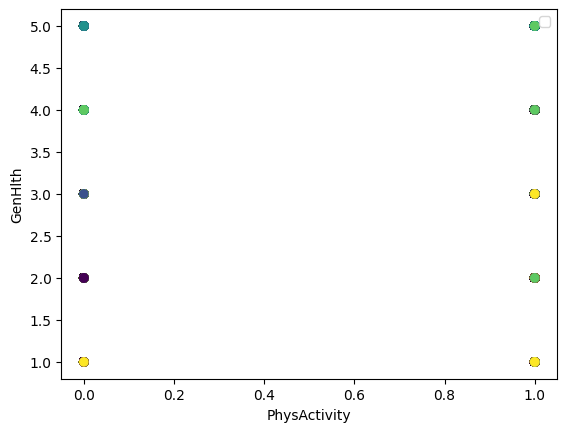

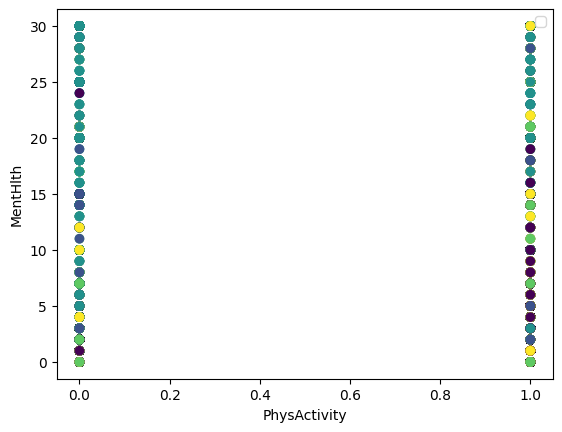

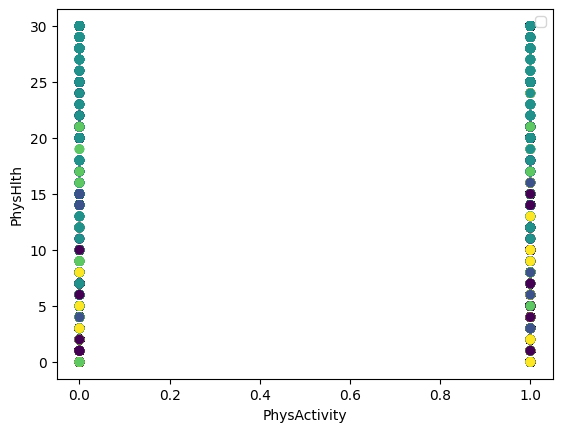

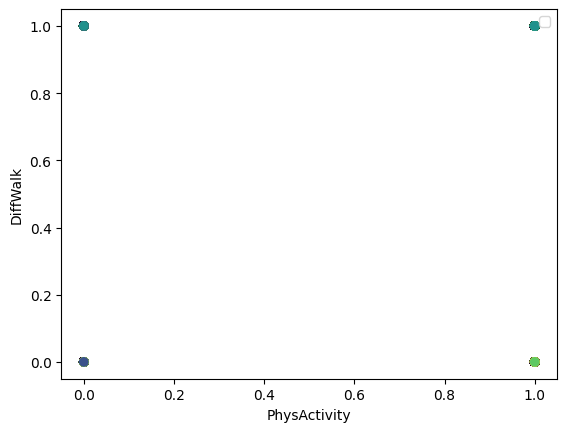

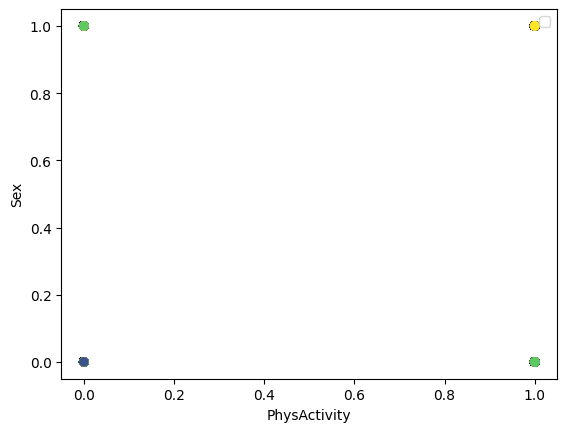

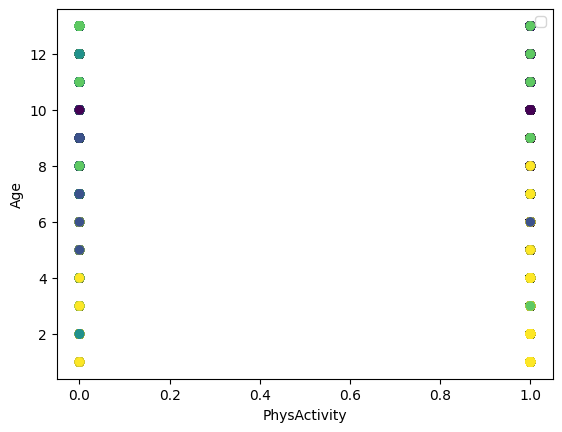

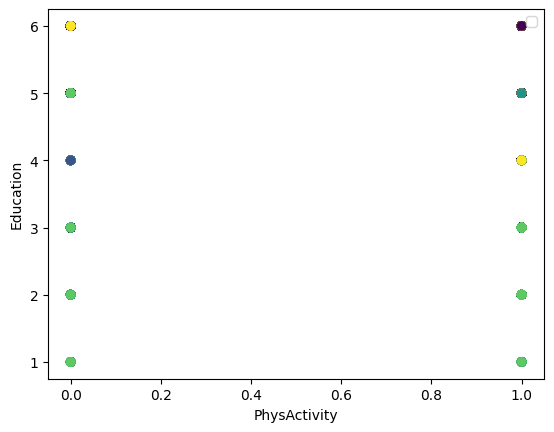

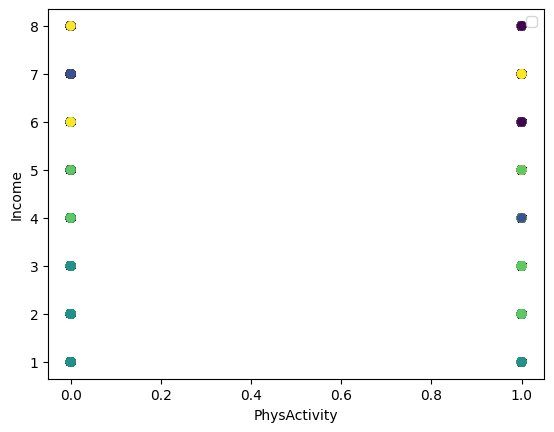

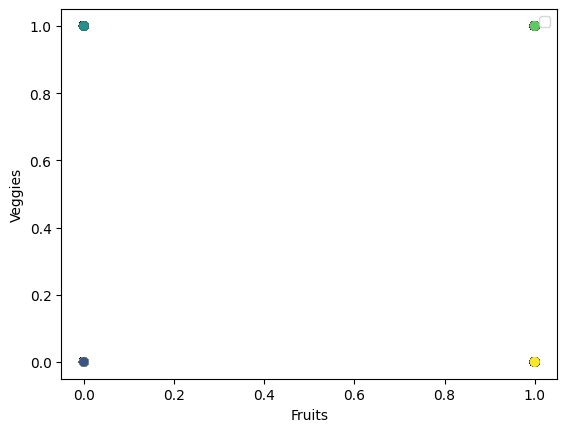

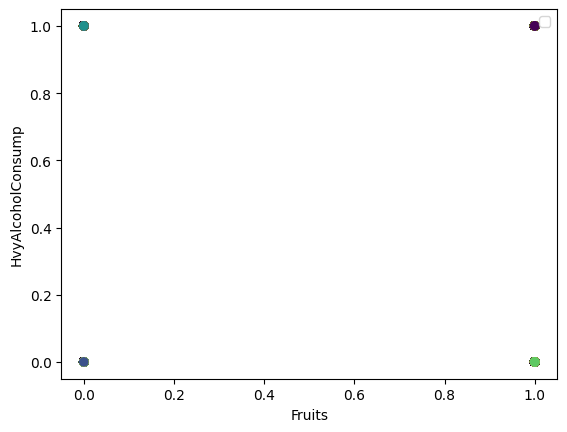

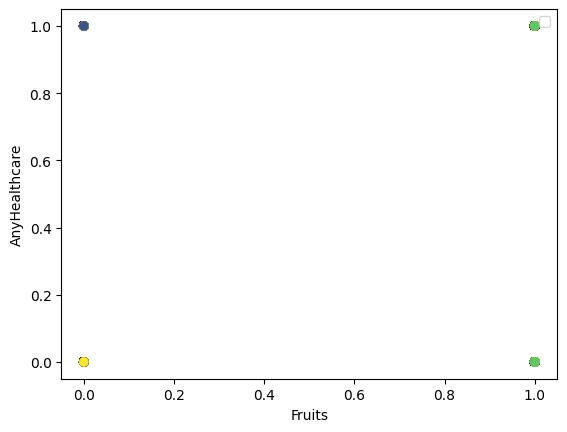

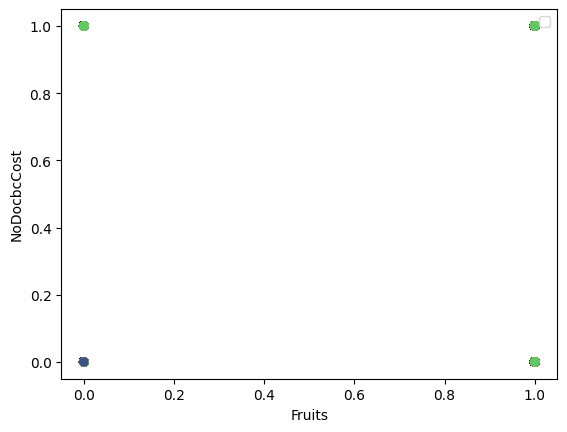

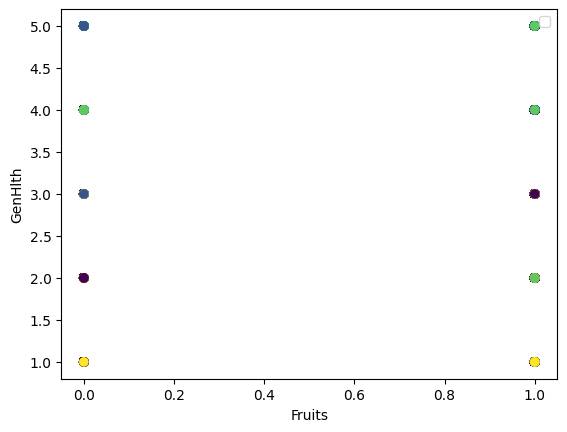

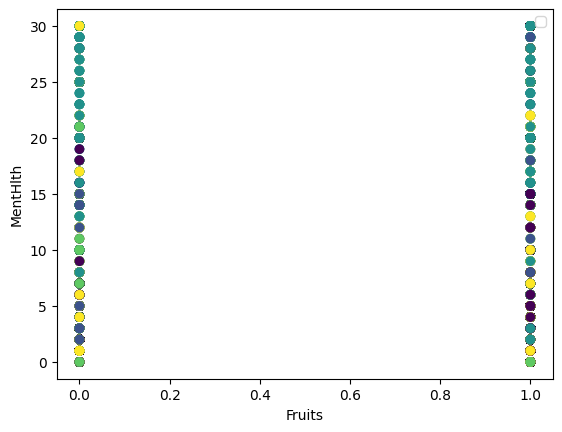

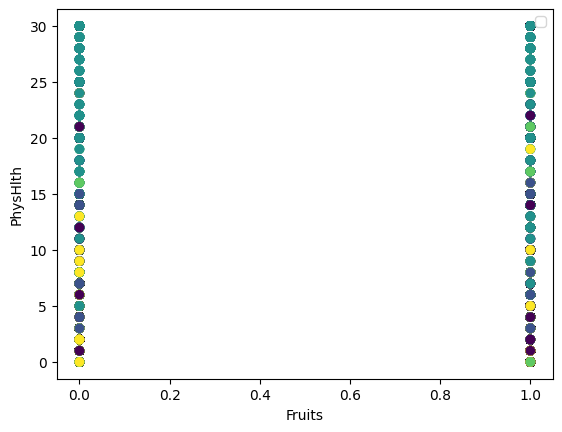

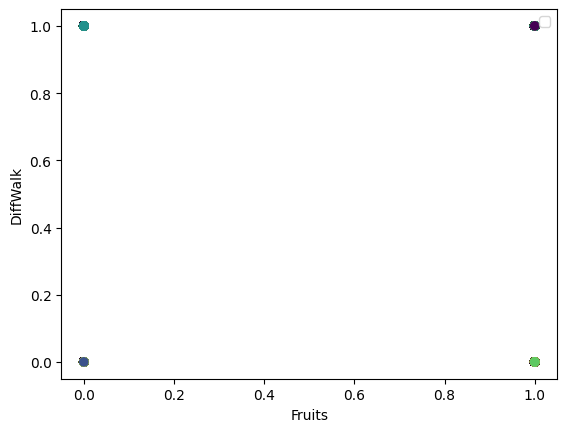

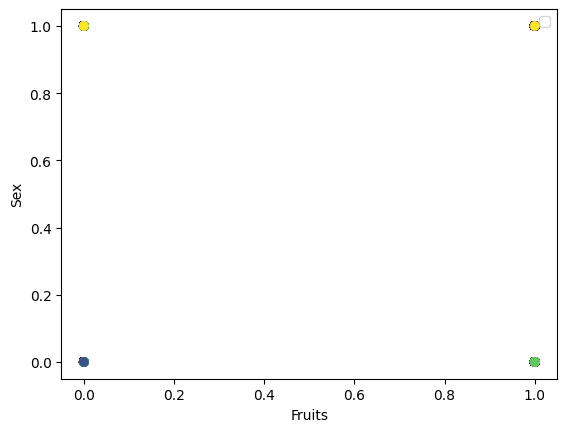

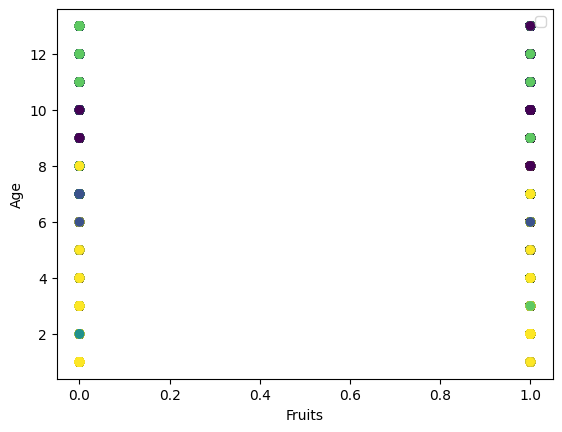

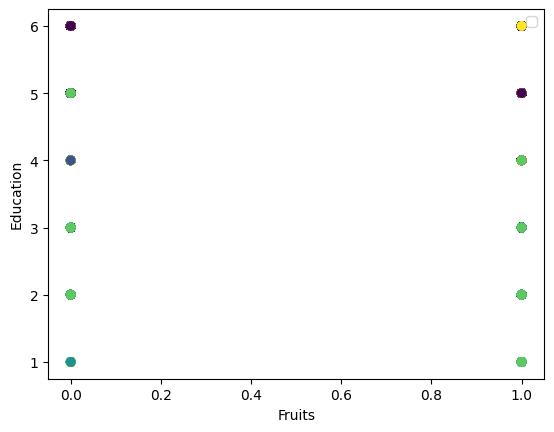

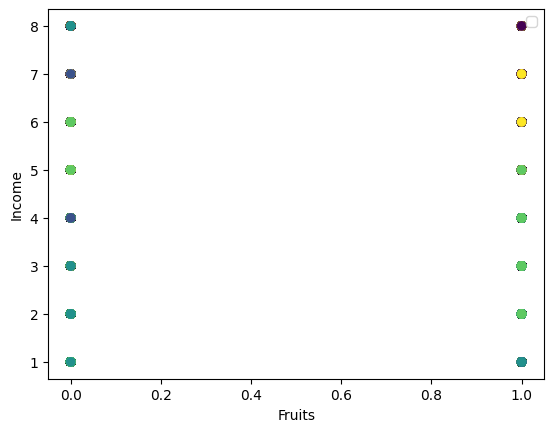

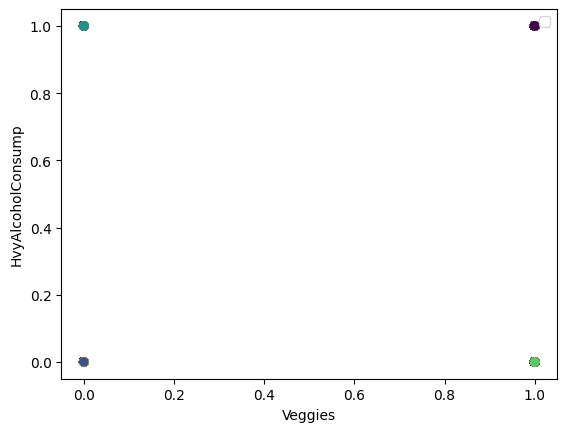

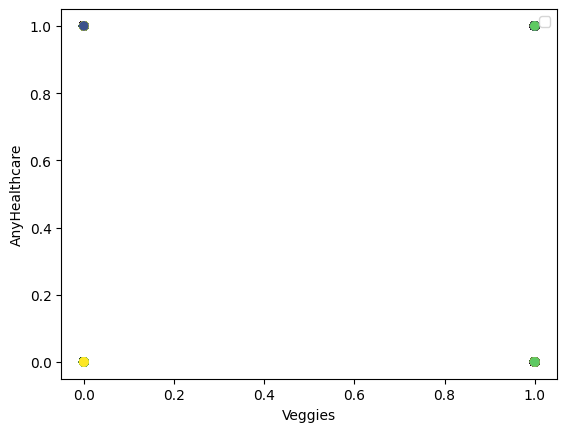

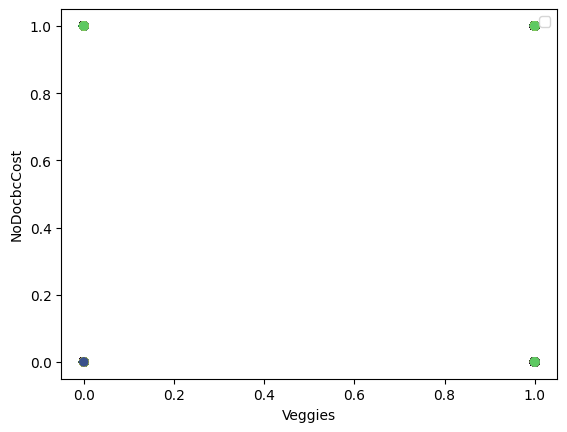

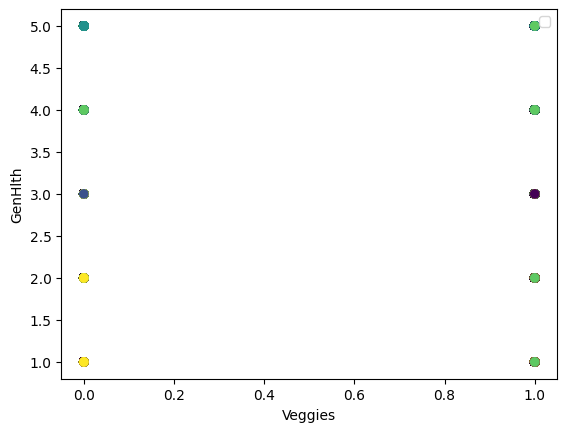

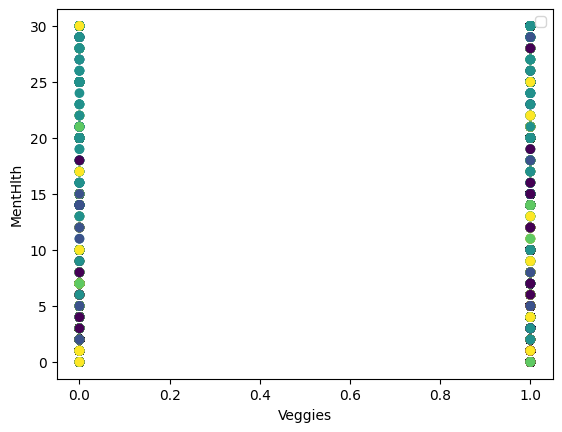

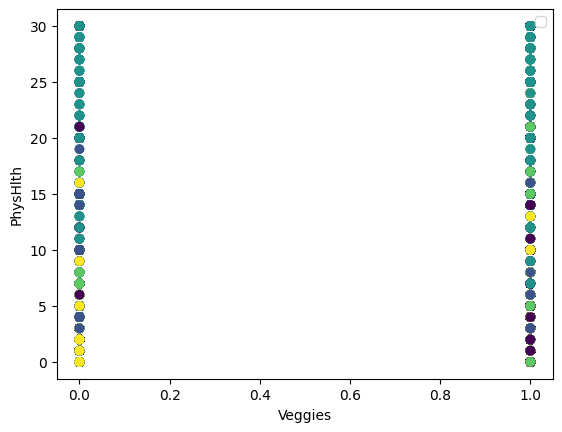

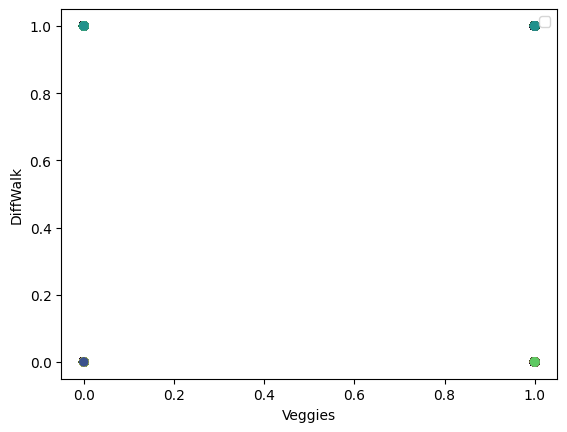

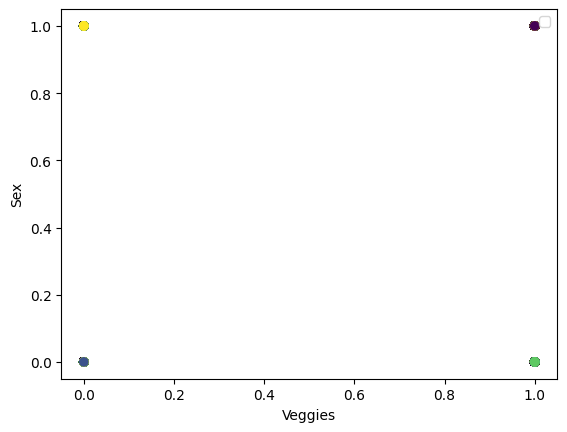

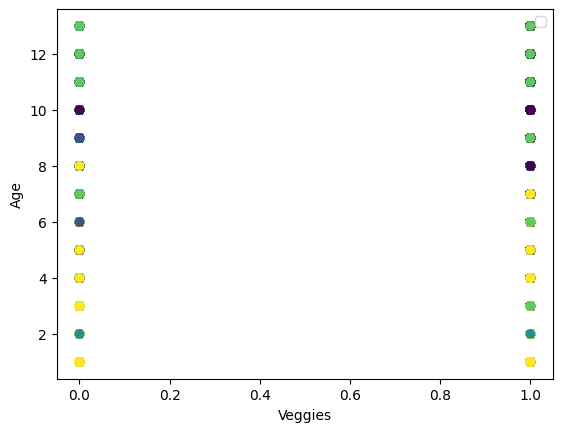

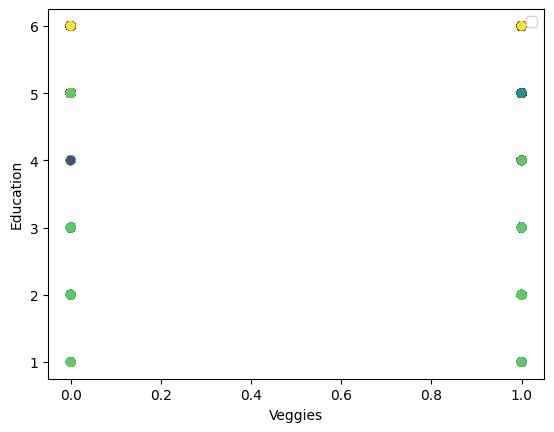

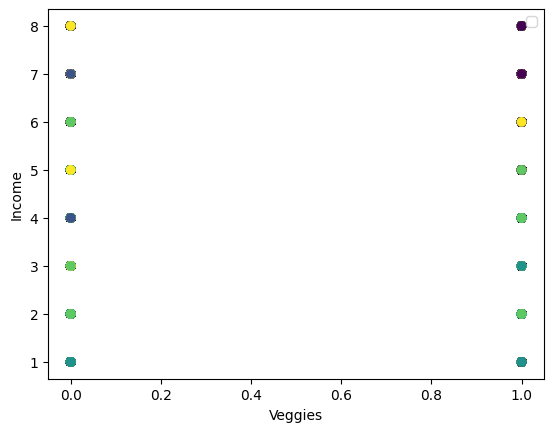

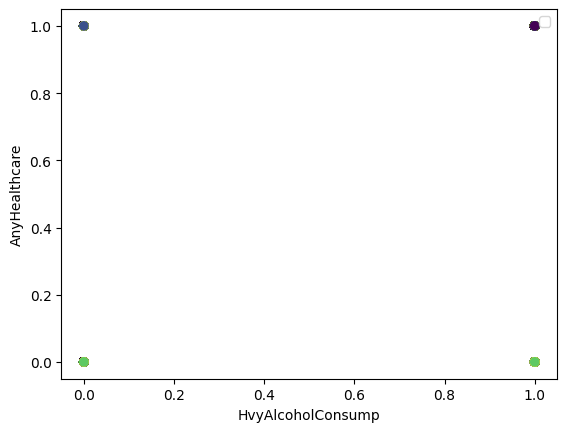

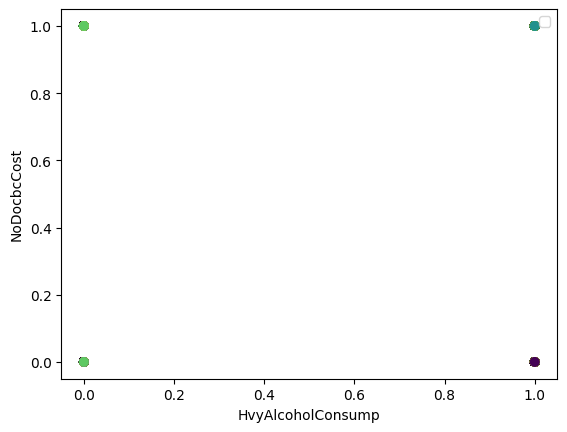

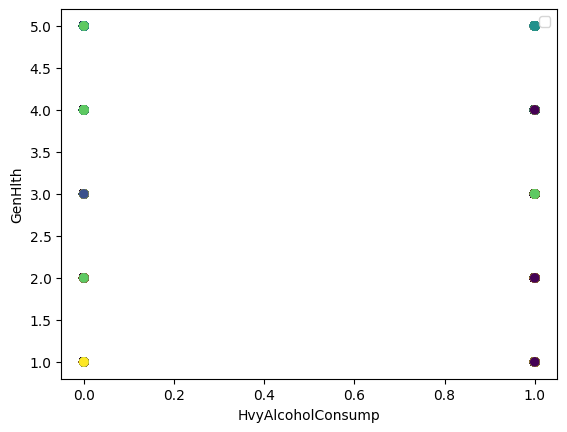

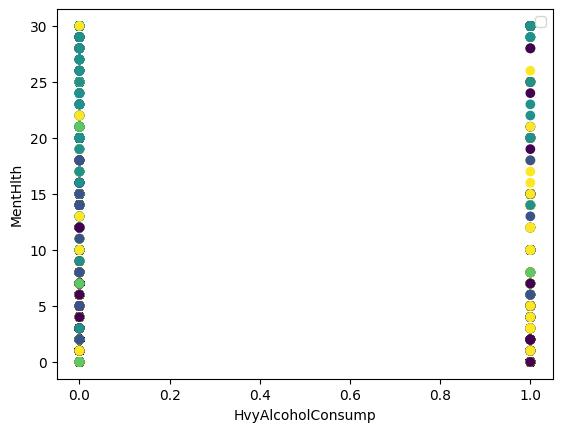

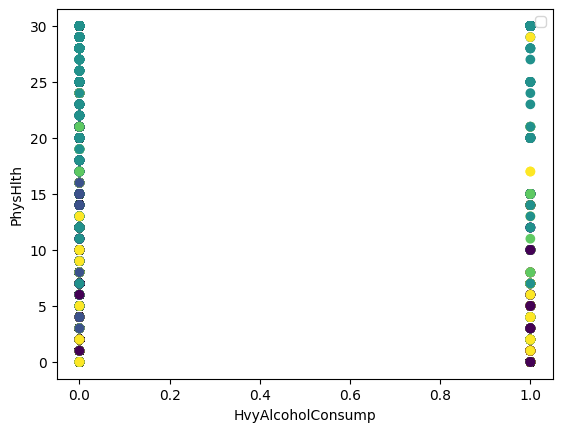

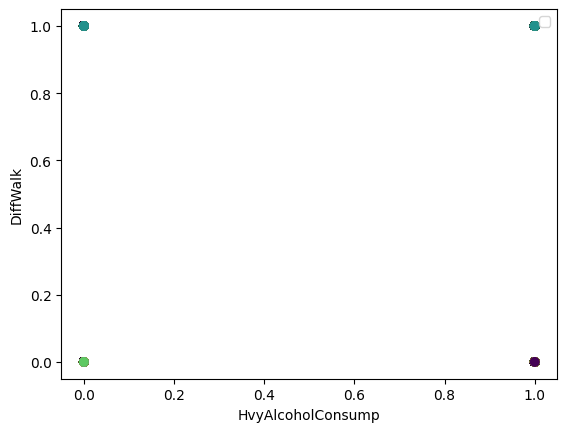

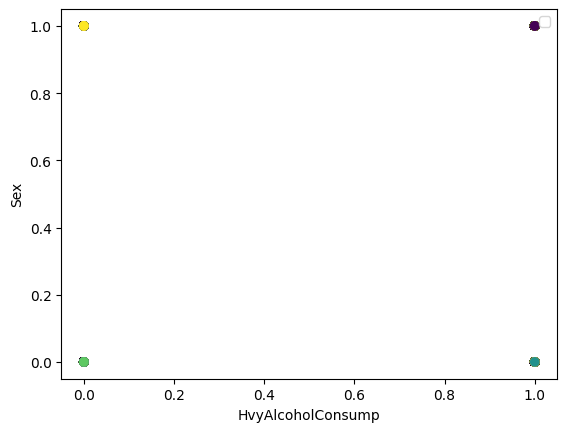

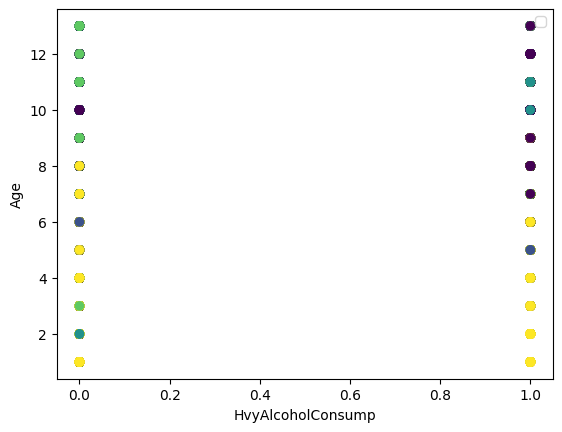

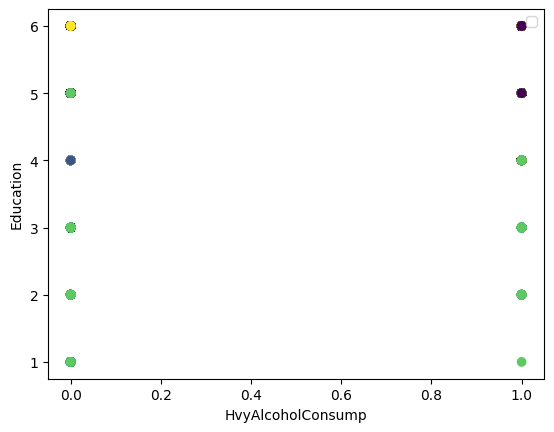

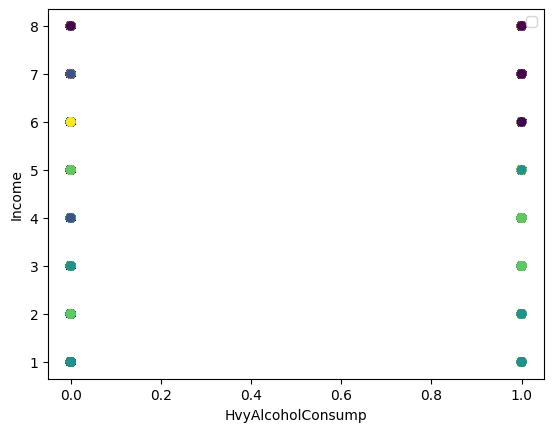

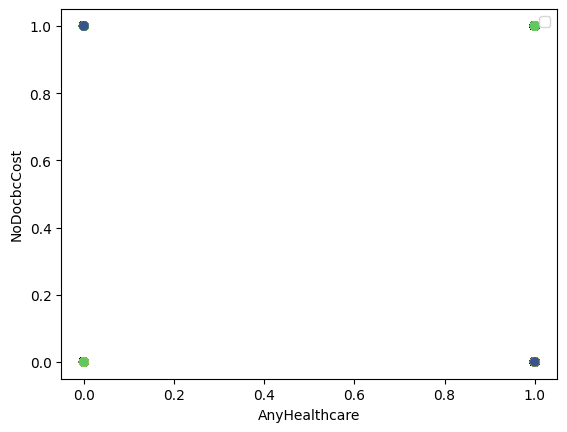

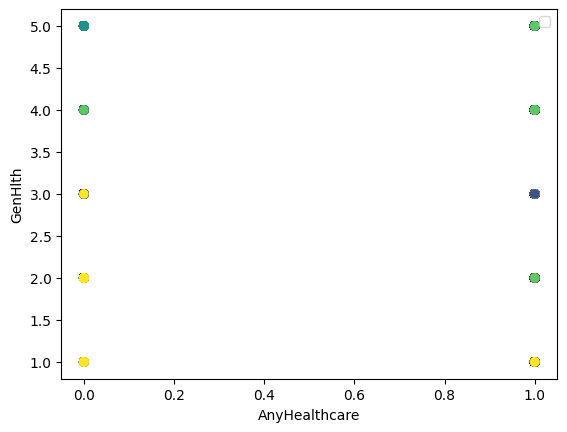

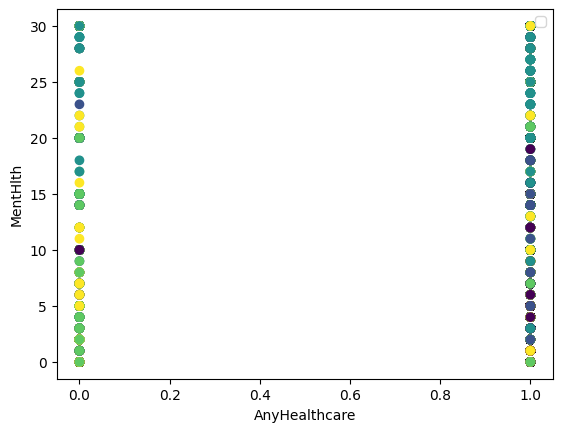

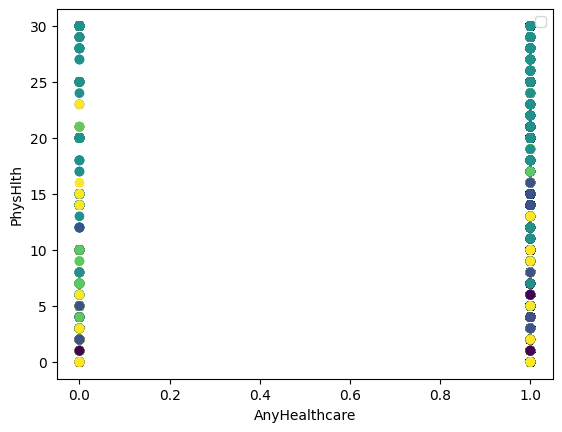

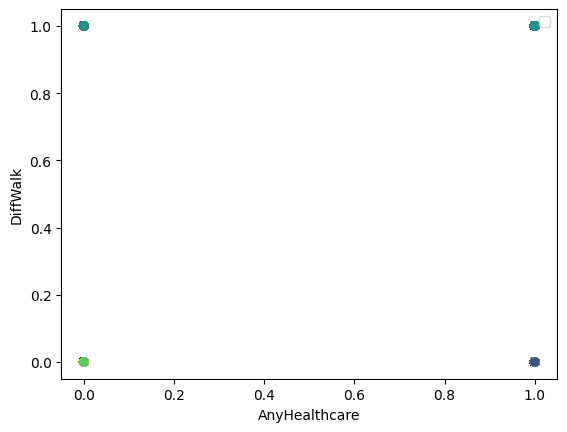

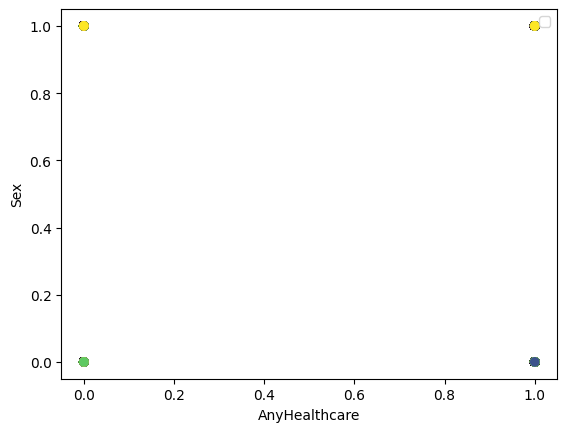

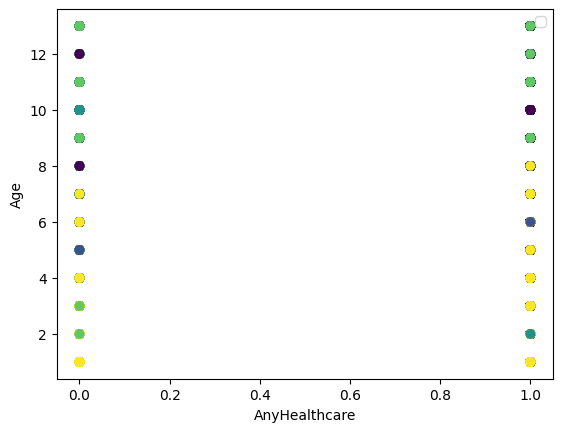

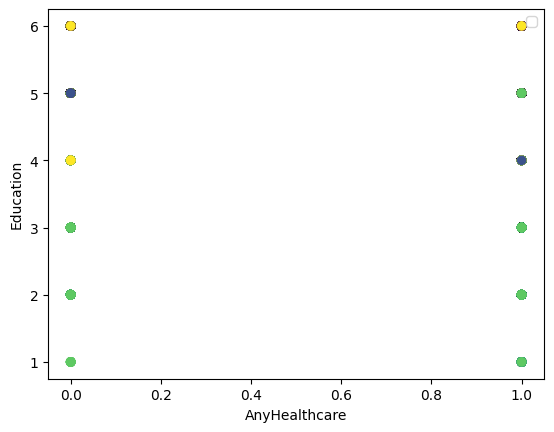

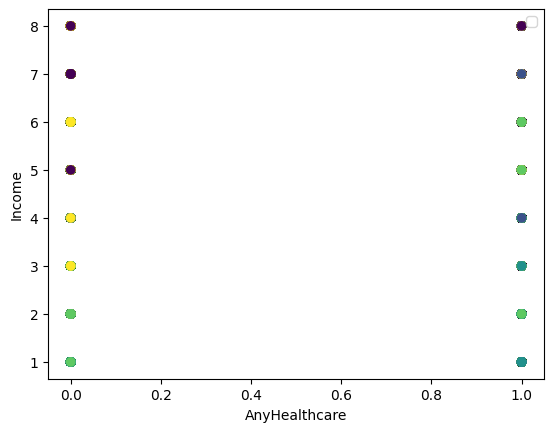

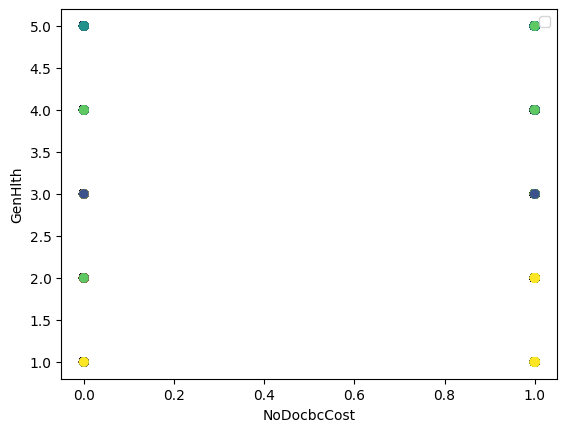

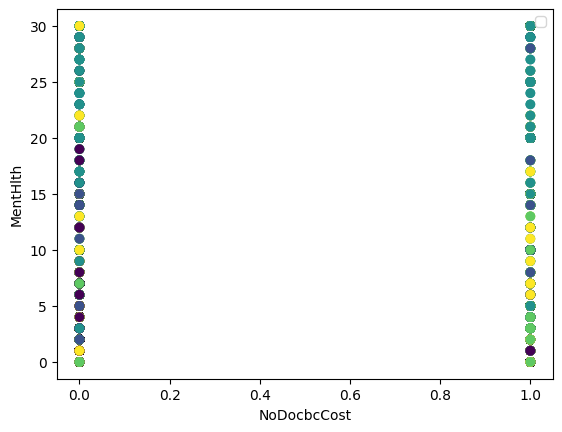

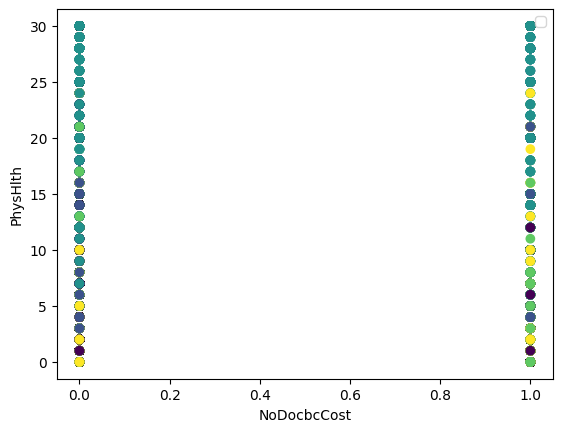

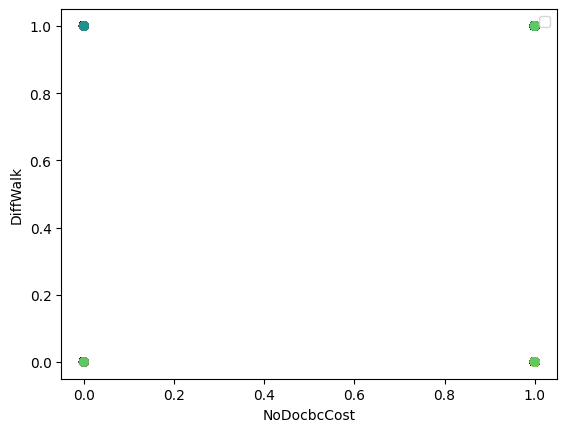

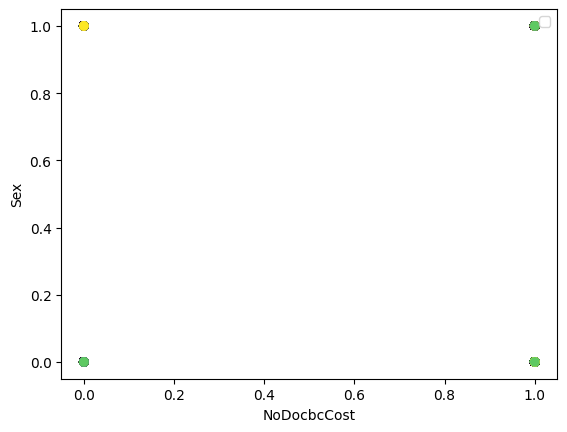

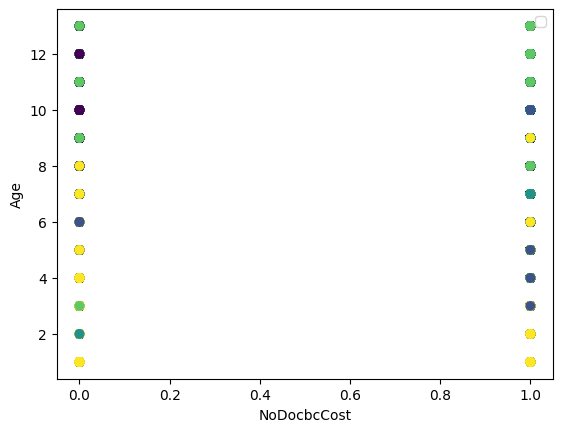

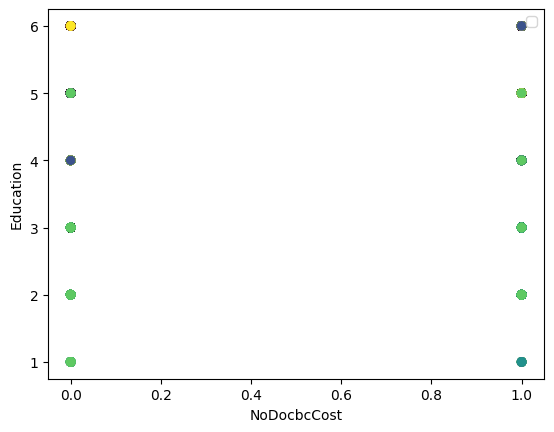

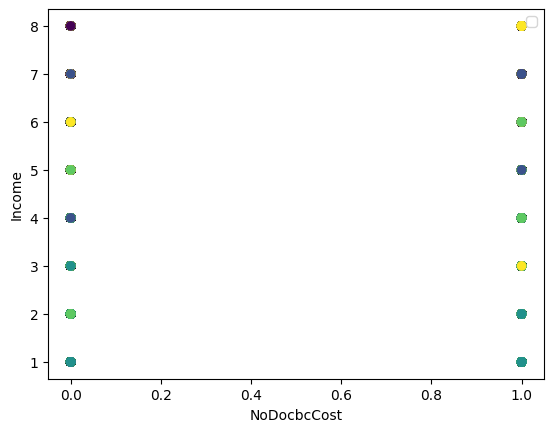

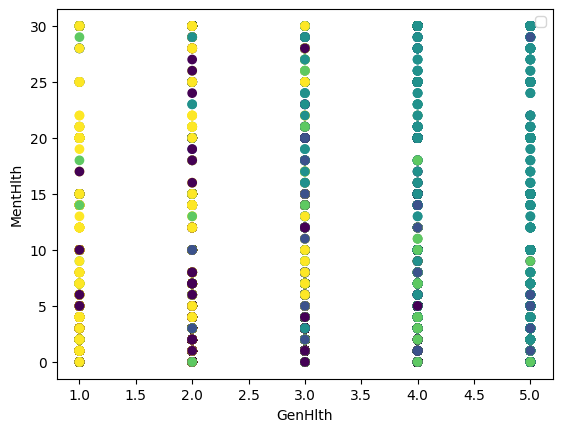

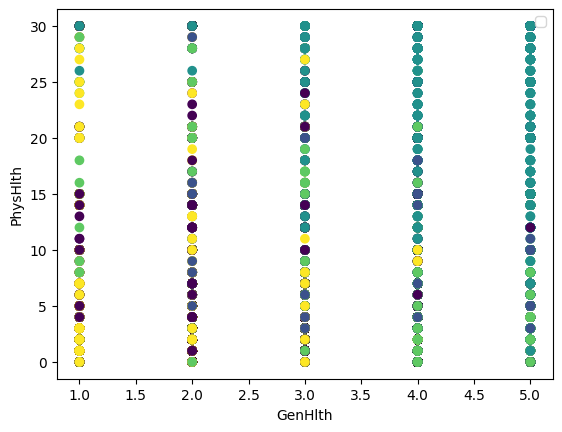

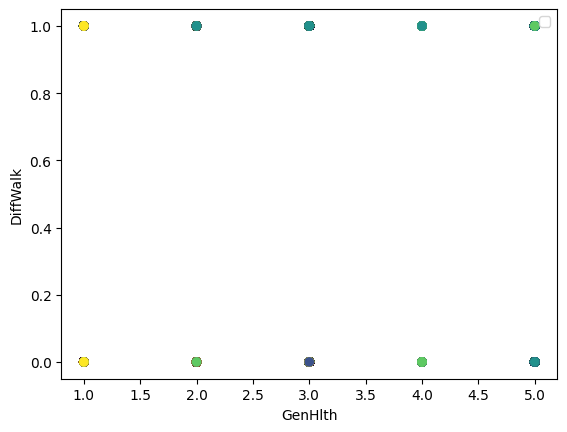

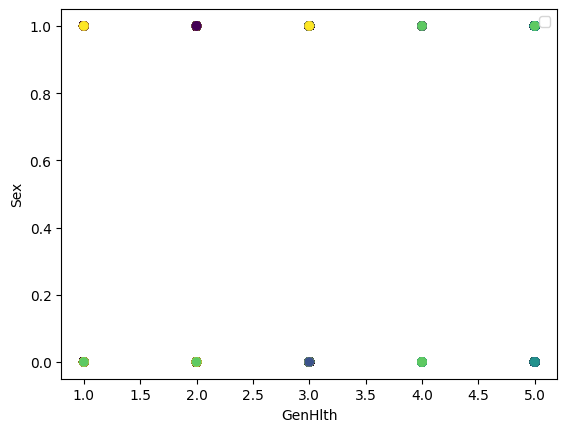

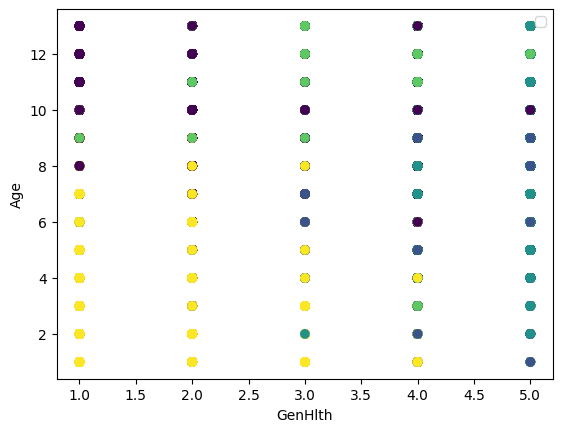

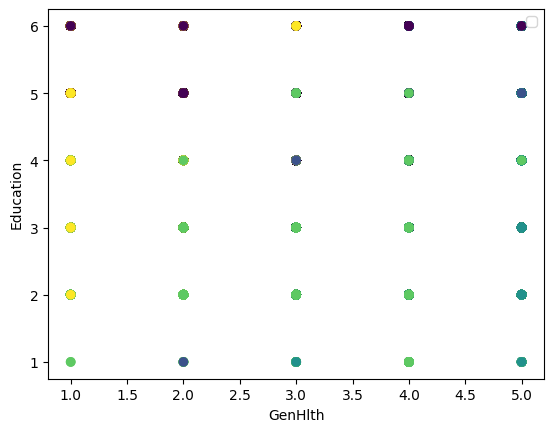

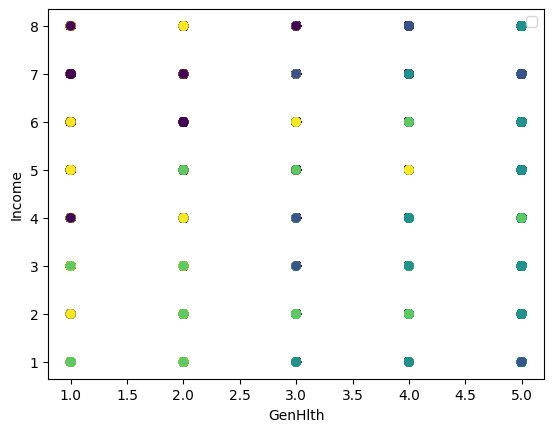

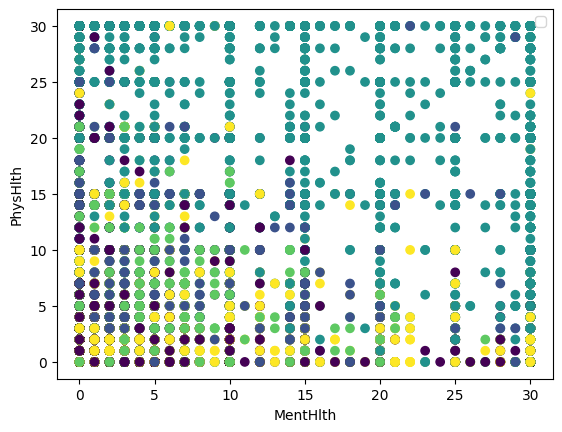

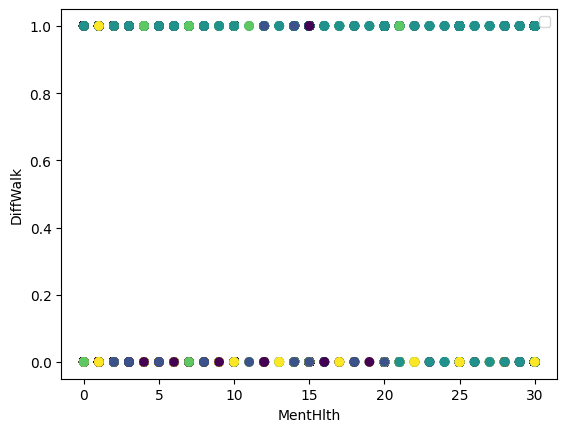

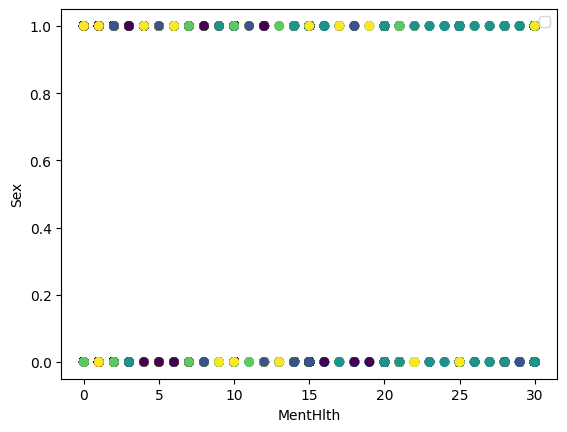

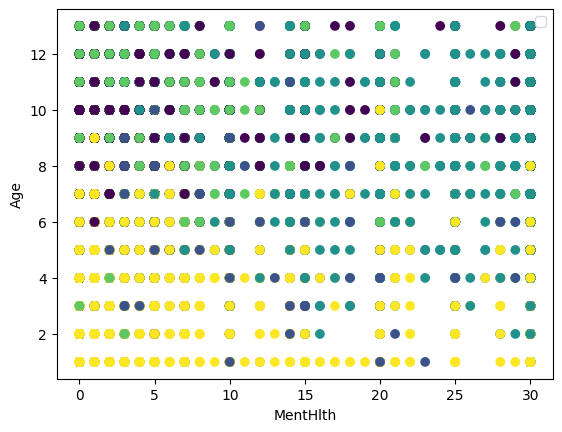

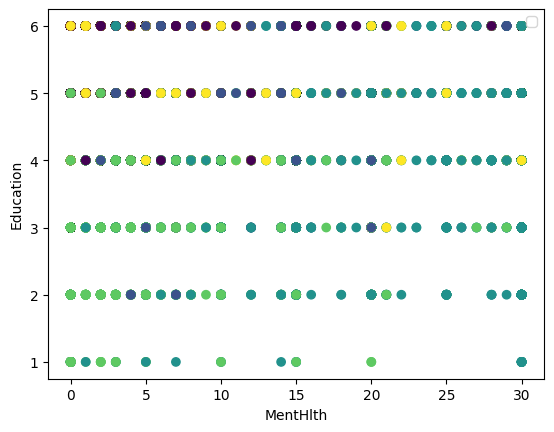

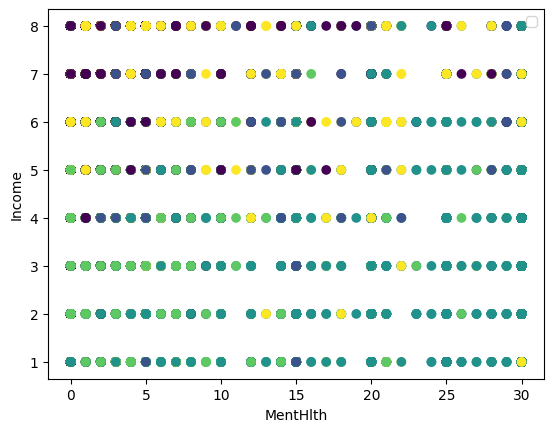

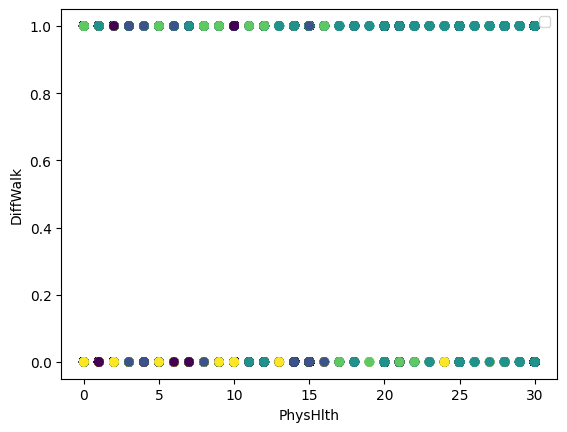

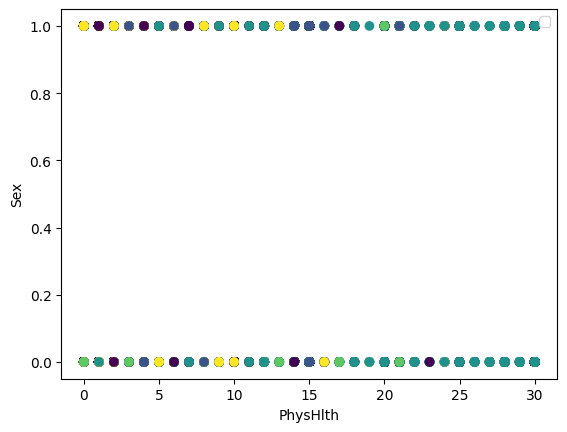

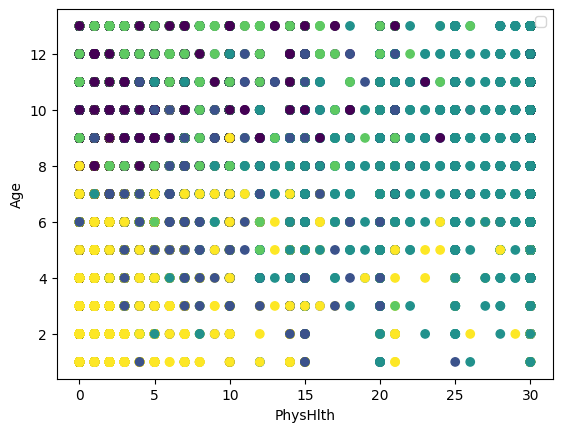

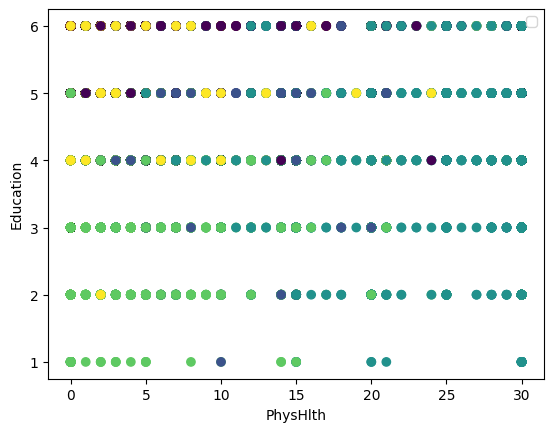

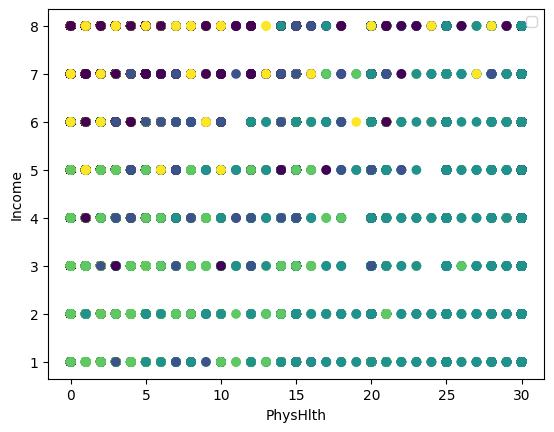

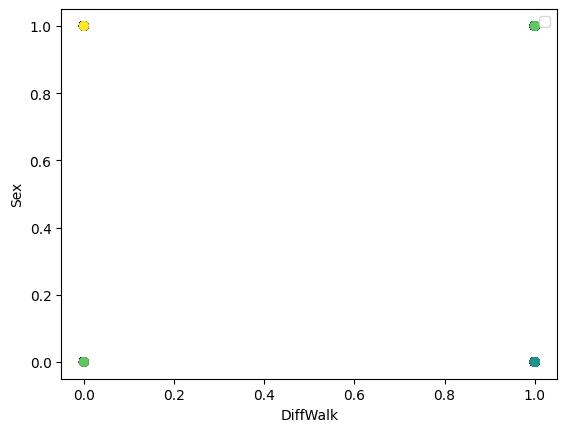

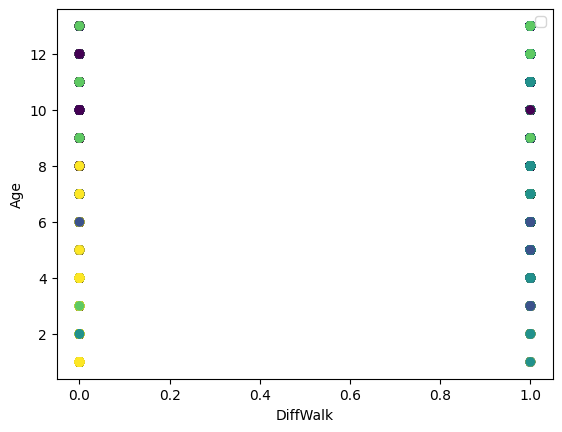

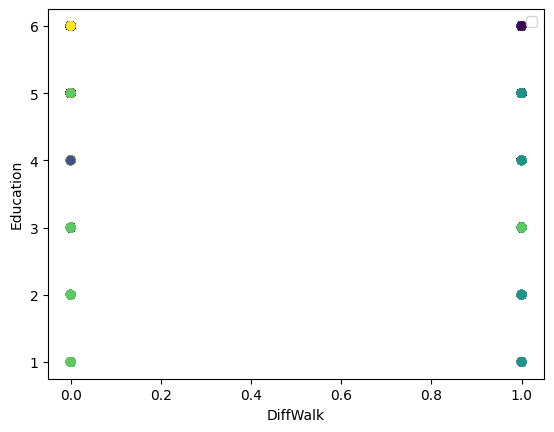

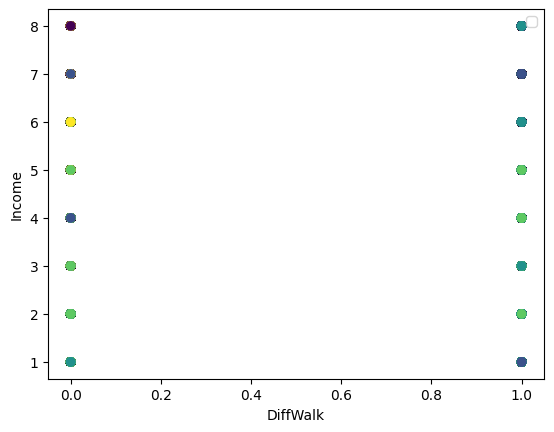

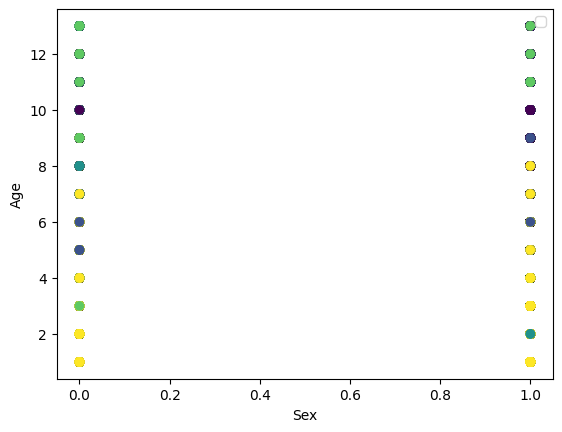

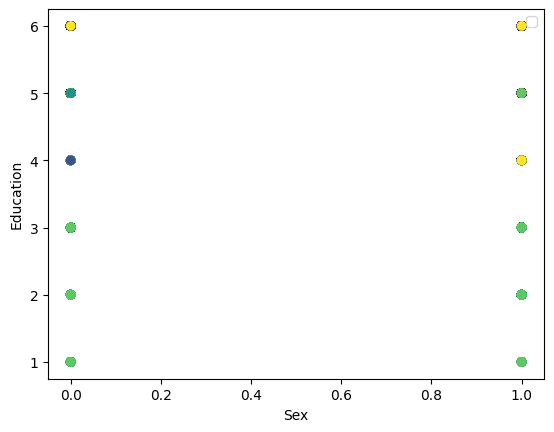

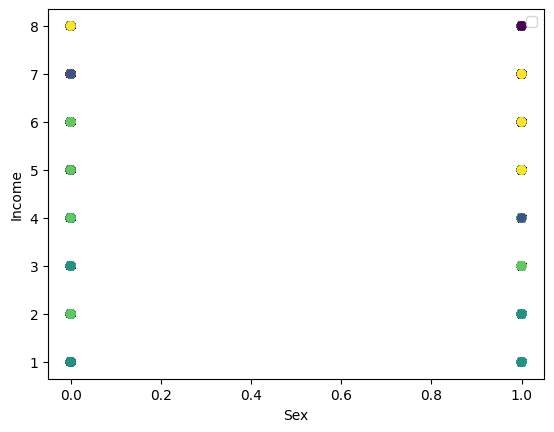

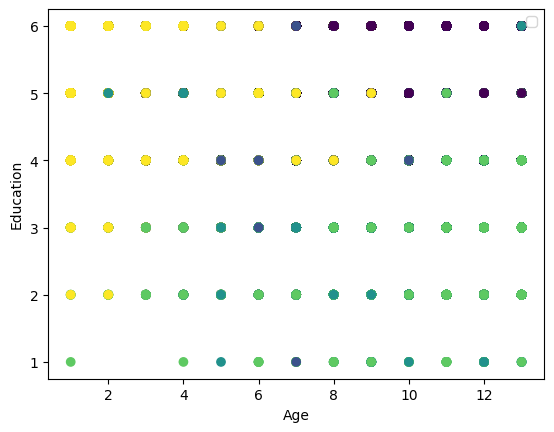

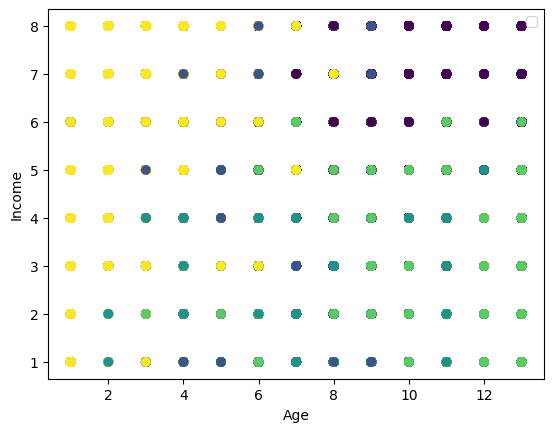

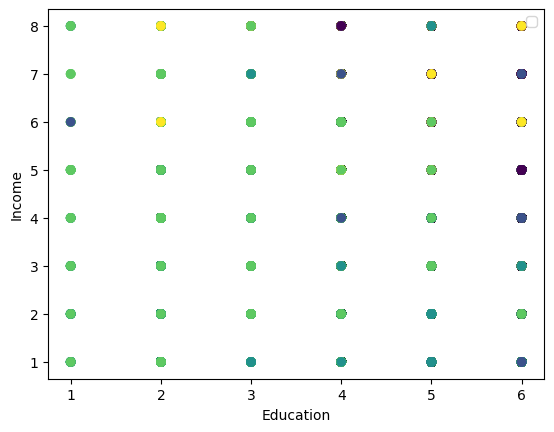

In [26]:
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):

        plt.scatter(df.iloc[:, i], df.iloc[:, j], c=y_kmeans)
        plt.xlabel(df.columns[i])
        plt.ylabel(df.columns[j])
        plt.legend()
        plt.show()

In [27]:
pd.DataFrame(kmeans.cluster_centers_)

0         1         2         3         4         5         6   \
0 -0.267005 -0.398140 -0.324514 -0.397056  0.516697  0.597959  0.598896   
1  1.649132  0.400536 -0.070355 -0.120976 -0.265476 -0.009856  0.011770   
2  0.239625  1.253832  1.222132  1.883834  0.150510 -0.413649 -0.724848   
3 -0.207128  0.212236 -0.277049 -0.337214  0.554725 -0.932705 -0.869494   
4 -0.458088 -0.773673 -0.156129 -0.451107 -1.156799  0.392649  0.542896   

         7         8         9         10        11        12        13  \
0  0.367333  0.632667  0.381017  0.618983  0.010675  0.989325  0.522224   
1  0.217963  0.782037  0.379932  0.620068  0.015909  0.984091  0.553677   
2  0.249007  0.750993  0.308324  0.691676  0.015359  0.984641  0.367641   
3  0.299345  0.700655  0.398070  0.601930  0.020379  0.979621  0.454687   
4  0.895944  0.104056  0.830690  0.169310  0.058046  0.941954  0.690090   

         14        15        16        17        18        19        20  \
0  0.477776  0.957298  0.042702  0.867673  0.132327  0.168187  0.831813   
1  0.446323  0.952524  0.047476  0.867093  0.132907  0.447075  0.552925   
2  0.632359  0.842440  0.157560  0.682143  0.317857  0.541089  0.458911   
3  0.545313  0.914367  0.085633  0.803023  0.196977  0.376409  0.623591   
4  0.309910  0.994860  0.005140  0.991162  0.008838  0.141039  0.858961   

         21        22        23        24        25        26        27  \
0  0.302019  0.697981  0.136306  0.863694  0.950068  0.049932  0.012762   
1  0.503069  0.496931  0.243893  0.756107  0.970312  0.029688  0.053990   
2  0.456174  0.543826  0.285197  0.714803  0.971401  0.028599  0.053668   
3  0.429381  0.570619  0.306363  0.693637  0.972198  0.027802  0.063635   
4  0.355544  0.644456  0.150755  0.849245  0.936188  0.063812  0.058860   

         28        29        30        31        32        33        34  
0  0.987238  0.975641  0.024359  0.904843  0.095157  0.421002  0.578998  
1  0.946010  0.871352  0.128648  0.625579  0.374421  0.596392  0.403608  
2  0.946332  0.787272  0.212728  0.269485  0.730515  0.592374  0.407626  
3  0.936365  0.903975  0.096025  0.707605  0.292395  0.611850  0.388150  
4  0.941140  0.919952  0.080048  0.980756  0.019244  0.574876  0.425124